In [1]:
# INTRODUCTION

#The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct 
#various statistical hypothesis tests in order to get meaningful information from it. 
#The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target 
#variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential 
#passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that 
#will be of enormous value to passengers.

# https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?resource=download

#DATA COLLECTION AND METHODOLOGY
#Octoparse scraping tool was used to extract data from the website. Data was collected in two parts: one for 
#economy class tickets and another for business class tickets. A total of 300261 distinct flight booking options was 
#extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022.
#Data source was secondary data and was collected from Ease my trip website.

#DATASET
#Dataset contains information about flight booking options from the website Easemytrip for flight travel between 
#India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from IPython.display import display 
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LSTM
from keras import callbacks
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, f_oneway, kruskal

In [3]:
cleaned = pd.read_csv("Clean_Dataset.csv")
economy = pd.read_csv("economy.csv")
business = pd.read_csv("business.csv")

In [4]:
economy

date   airline ch_code  num_code dep_time     from time_taken  \
0       11-02-2022  SpiceJet      SG      8709    18:55    Delhi    02h 10m   
1       11-02-2022  SpiceJet      SG      8157    06:20    Delhi    02h 20m   
2       11-02-2022   AirAsia      I5       764    04:25    Delhi    02h 10m   
3       11-02-2022   Vistara      UK       995    10:20    Delhi    02h 15m   
4       11-02-2022   Vistara      UK       963    08:50    Delhi    02h 20m   
...            ...       ...     ...       ...      ...      ...        ...   
206769  31-03-2022   Vistara      UK       832    07:05  Chennai    13h 50m   
206770  31-03-2022   Vistara      UK       832    07:05  Chennai    13h 50m   
206771  31-03-2022   Vistara      UK       826    12:30  Chennai    20h 35m   
206772  31-03-2022   Vistara      UK       822    09:45  Chennai    23h 20m   
206773  31-03-2022   Vistara      UK       824    20:30  Chennai    24h 25m   

                                                     stop arr_time         to  \
0                                               non-stop     21:05     Mumbai   
1                                               non-stop     08:40     Mumbai   
2                                               non-stop     06:35     Mumbai   
3                                               non-stop     12:35     Mumbai   
4                                               non-stop     11:10     Mumbai   
...                                                   ...      ...        ...   
206769  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    20:55  Hyderabad   
206770  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    20:55  Hyderabad   
206771  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    09:05  Hyderabad   
206772  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    09:05  Hyderabad   
206773  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    20:55  Hyderabad   

        price  
0       5,953  
1       5,953  
2       5,956  
3       5,955  
4       5,955  
...       ...  
206769  7,697  
206770  7,709  
206771  8,640  
206772  8,640  
206773  8,640  

[206774 rows x 11 columns]

In [5]:
business

date    airline ch_code  num_code dep_time     from time_taken  \
0      11-02-2022  Air India      AI       868    18:00    Delhi    02h 00m   
1      11-02-2022  Air India      AI       624    19:00    Delhi    02h 15m   
2      11-02-2022  Air India      AI       531    20:00    Delhi    24h 45m   
3      11-02-2022  Air India      AI       839    21:25    Delhi    26h 30m   
4      11-02-2022  Air India      AI       544    17:15    Delhi    06h 40m   
...           ...        ...     ...       ...      ...      ...        ...   
93482  31-03-2022    Vistara      UK       822    09:45  Chennai    10h 05m   
93483  31-03-2022    Vistara      UK       826    12:30  Chennai    10h 25m   
93484  31-03-2022    Vistara      UK       832    07:05  Chennai    13h 50m   
93485  31-03-2022    Vistara      UK       828    07:00  Chennai    10h 00m   
93486  31-03-2022    Vistara      UK       822    09:45  Chennai    10h 05m   

                                                    stop arr_time         to  \
0                                              non-stop     20:00     Mumbai   
1                                              non-stop     21:15     Mumbai   
2      1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    20:45     Mumbai   
3      1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    23:55     Mumbai   
4      1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    23:55     Mumbai   
...                                                  ...      ...        ...   
93482  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    19:50  Hyderabad   
93483  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    22:55  Hyderabad   
93484  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    20:55  Hyderabad   
93485  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    17:00  Hyderabad   
93486  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    19:50  Hyderabad   

        price  
0      25,612  
1      25,612  
2      42,220  
3      44,450  
4      46,690  
...       ...  
93482  69,265  
93483  77,105  
93484  79,099  
93485  81,585  
93486  81,585  

[93487 rows x 11 columns]

In [6]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [7]:
economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [8]:
economy["class"] = "Economy"
business["class"] = "Business"

complet = pd.concat([economy, business], axis = 0)

complet

date   airline ch_code  num_code dep_time     from time_taken  \
0      11-02-2022  SpiceJet      SG      8709    18:55    Delhi    02h 10m   
1      11-02-2022  SpiceJet      SG      8157    06:20    Delhi    02h 20m   
2      11-02-2022   AirAsia      I5       764    04:25    Delhi    02h 10m   
3      11-02-2022   Vistara      UK       995    10:20    Delhi    02h 15m   
4      11-02-2022   Vistara      UK       963    08:50    Delhi    02h 20m   
...           ...       ...     ...       ...      ...      ...        ...   
93482  31-03-2022   Vistara      UK       822    09:45  Chennai    10h 05m   
93483  31-03-2022   Vistara      UK       826    12:30  Chennai    10h 25m   
93484  31-03-2022   Vistara      UK       832    07:05  Chennai    13h 50m   
93485  31-03-2022   Vistara      UK       828    07:00  Chennai    10h 00m   
93486  31-03-2022   Vistara      UK       822    09:45  Chennai    10h 05m   

                                                    stop arr_time         to  \
0                                              non-stop     21:05     Mumbai   
1                                              non-stop     08:40     Mumbai   
2                                              non-stop     06:35     Mumbai   
3                                              non-stop     12:35     Mumbai   
4                                              non-stop     11:10     Mumbai   
...                                                  ...      ...        ...   
93482  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    19:50  Hyderabad   
93483  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    22:55  Hyderabad   
93484  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    20:55  Hyderabad   
93485  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    17:00  Hyderabad   
93486  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    19:50  Hyderabad   

        price     class  
0       5,953   Economy  
1       5,953   Economy  
2       5,956   Economy  
3       5,955   Economy  
4       5,955   Economy  
...       ...       ...  
93482  69,265  Business  
93483  77,105  Business  
93484  79,099  Business  
93485  81,585  Business  
93486  81,585  Business  

[300261 rows x 12 columns]

In [9]:
complet.duplicated().sum()

2

In [10]:
complet[complet.duplicated(keep = False)]

date    airline ch_code  num_code dep_time   from time_taken  \
516   14-02-2022  Air India      AI       807    17:20  Delhi    15h 15m   
563   14-02-2022  Air India      AI       807    17:20  Delhi    15h 15m   
6080  13-03-2022  Air India      AI       475    13:00  Delhi    24h 35m   
6181  13-03-2022  Air India      AI       475    13:00  Delhi    24h 35m   

                                                   stop arr_time      to  \
516   1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    08:35  Mumbai   
563   1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    08:35  Mumbai   
6080  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    13:35  Mumbai   
6181  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...    13:35  Mumbai   

       price    class  
516   12,150  Economy  
563   12,150  Economy  
6080   4,780  Economy  
6181   4,780  Economy

In [11]:
complet.drop_duplicates(keep='first', inplace=True)
complet.duplicated().sum()

0

In [12]:
complet["num_code"] = complet["num_code"].astype("str")
complet["flight_code"] = complet["ch_code"] +"-"+ complet["num_code"]
complet = complet.drop(["ch_code", "num_code"], axis = 1)
complet.head()

date   airline dep_time   from time_taken       stop arr_time  \
0  11-02-2022  SpiceJet    18:55  Delhi    02h 10m  non-stop     21:05   
1  11-02-2022  SpiceJet    06:20  Delhi    02h 20m  non-stop     08:40   
2  11-02-2022   AirAsia    04:25  Delhi    02h 10m  non-stop     06:35   
3  11-02-2022   Vistara    10:20  Delhi    02h 15m  non-stop     12:35   
4  11-02-2022   Vistara    08:50  Delhi    02h 20m  non-stop     11:10   

       to  price    class flight_code  
0  Mumbai  5,953  Economy     SG-8709  
1  Mumbai  5,953  Economy     SG-8157  
2  Mumbai  5,956  Economy      I5-764  
3  Mumbai  5,955  Economy      UK-995  
4  Mumbai  5,955  Economy      UK-963

In [13]:
def time_change(df, col):
    df[[col + "_hour", col + "_minut"]] = df[col].apply(lambda x: pd.Series(str(x).split(":")))
    return df

time_change(complet, "arr_time")
time_change(complet, "dep_time")

complet["dep_time_hour"] = complet["dep_time_hour"].astype("string")
complet["arr_time_hour"] = complet["arr_time_hour"].astype("string")

def time_category(df,col):
    df[col] = df[col].replace({'01':'Late Night', '02':'Late Night', '03':'Late Night', '04':'Late Night'})
    df[col] = df[col].replace({'05':'Early Morning', '06':'Early Morning', '07':'Early Morning', '08':'Early Morning'})
    df[col] = df[col].replace({'09':'Morning', '10':'Morning', '11':'Morning', '12':'Morning'})
    df[col] = df[col].replace({'13':'Afternoon', '14':'Afternoon', '15':'Afternoon', '16':'Afternoon'})
    df[col] = df[col].replace({'17':'Early Evening', '18':'Early Evening', '19':'Early Evening', '20':'Early Evening'})
    df[col] = df[col].replace({'21':'Evening', '22':'Evening', '23':'Evening', '00':'Evening'})
    return df

time_category(complet, "dep_time_hour")
time_category(complet, "arr_time_hour")

complet = complet.drop(["arr_time_minut", "dep_time_minut", "dep_time", "arr_time"], axis = 1)

complet

date   airline     from time_taken  \
0      11-02-2022  SpiceJet    Delhi    02h 10m   
1      11-02-2022  SpiceJet    Delhi    02h 20m   
2      11-02-2022   AirAsia    Delhi    02h 10m   
3      11-02-2022   Vistara    Delhi    02h 15m   
4      11-02-2022   Vistara    Delhi    02h 20m   
...           ...       ...      ...        ...   
93482  31-03-2022   Vistara  Chennai    10h 05m   
93483  31-03-2022   Vistara  Chennai    10h 25m   
93484  31-03-2022   Vistara  Chennai    13h 50m   
93485  31-03-2022   Vistara  Chennai    10h 00m   
93486  31-03-2022   Vistara  Chennai    10h 05m   

                                                    stop         to   price  \
0                                              non-stop      Mumbai   5,953   
1                                              non-stop      Mumbai   5,953   
2                                              non-stop      Mumbai   5,956   
3                                              non-stop      Mumbai   5,955   
4                                              non-stop      Mumbai   5,955   
...                                                  ...        ...     ...   
93482  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  Hyderabad  69,265   
93483  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  Hyderabad  77,105   
93484  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  Hyderabad  79,099   
93485  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  Hyderabad  81,585   
93486  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  Hyderabad  81,585   

          class flight_code  arr_time_hour  dep_time_hour  
0       Economy     SG-8709        Evening  Early Evening  
1       Economy     SG-8157  Early Morning  Early Morning  
2       Economy      I5-764  Early Morning     Late Night  
3       Economy      UK-995        Morning        Morning  
4       Economy      UK-963        Morning  Early Morning  
...         ...         ...            ...            ...  
93482  Business      UK-822  Early Evening        Morning  
93483  Business      UK-826        Evening        Morning  
93484  Business      UK-832  Early Evening  Early Morning  
93485  Business      UK-828  Early Evening  Early Morning  
93486  Business      UK-822  Early Evening        Morning  

[300259 rows x 11 columns]

In [14]:
to_drop = complet[(complet["airline"] == "Trujet") | (complet["airline"] == "StarAir")].index
complet.drop(to_drop, axis = 0, inplace = True)

complet

date   airline     from time_taken  \
0      11-02-2022  SpiceJet    Delhi    02h 10m   
1      11-02-2022  SpiceJet    Delhi    02h 20m   
2      11-02-2022   AirAsia    Delhi    02h 10m   
3      11-02-2022   Vistara    Delhi    02h 15m   
4      11-02-2022   Vistara    Delhi    02h 20m   
...           ...       ...      ...        ...   
93482  31-03-2022   Vistara  Chennai    10h 05m   
93483  31-03-2022   Vistara  Chennai    10h 25m   
93484  31-03-2022   Vistara  Chennai    13h 50m   
93485  31-03-2022   Vistara  Chennai    10h 00m   
93486  31-03-2022   Vistara  Chennai    10h 05m   

                                                    stop         to   price  \
0                                              non-stop      Mumbai   5,953   
1                                              non-stop      Mumbai   5,953   
2                                              non-stop      Mumbai   5,956   
3                                              non-stop      Mumbai   5,955   
4                                              non-stop      Mumbai   5,955   
...                                                  ...        ...     ...   
93482  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  Hyderabad  69,265   
93483  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  Hyderabad  77,105   
93484  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  Hyderabad  79,099   
93485  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  Hyderabad  81,585   
93486  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  Hyderabad  81,585   

          class flight_code  arr_time_hour  dep_time_hour  
0       Economy     SG-8709        Evening  Early Evening  
1       Economy     SG-8157  Early Morning  Early Morning  
2       Economy      I5-764  Early Morning     Late Night  
3       Economy      UK-995        Morning        Morning  
4       Economy      UK-963        Morning  Early Morning  
...         ...         ...            ...            ...  
93482  Business      UK-822  Early Evening        Morning  
93483  Business      UK-826        Evening        Morning  
93484  Business      UK-832  Early Evening  Early Morning  
93485  Business      UK-828  Early Evening  Early Morning  
93486  Business      UK-822  Early Evening        Morning  

[300150 rows x 11 columns]

In [15]:
complet['stop'] = complet["stop"].astype(str).str[0]
complet["stop"] = complet["stop"].replace("n", "0")

complet["stop"] = complet["stop"].astype(int)

complet

date   airline     from time_taken  stop         to   price  \
0      11-02-2022  SpiceJet    Delhi    02h 10m     0     Mumbai   5,953   
1      11-02-2022  SpiceJet    Delhi    02h 20m     0     Mumbai   5,953   
2      11-02-2022   AirAsia    Delhi    02h 10m     0     Mumbai   5,956   
3      11-02-2022   Vistara    Delhi    02h 15m     0     Mumbai   5,955   
4      11-02-2022   Vistara    Delhi    02h 20m     0     Mumbai   5,955   
...           ...       ...      ...        ...   ...        ...     ...   
93482  31-03-2022   Vistara  Chennai    10h 05m     1  Hyderabad  69,265   
93483  31-03-2022   Vistara  Chennai    10h 25m     1  Hyderabad  77,105   
93484  31-03-2022   Vistara  Chennai    13h 50m     1  Hyderabad  79,099   
93485  31-03-2022   Vistara  Chennai    10h 00m     1  Hyderabad  81,585   
93486  31-03-2022   Vistara  Chennai    10h 05m     1  Hyderabad  81,585   

          class flight_code  arr_time_hour  dep_time_hour  
0       Economy     SG-8709        Evening  Early Evening  
1       Economy     SG-8157  Early Morning  Early Morning  
2       Economy      I5-764  Early Morning     Late Night  
3       Economy      UK-995        Morning        Morning  
4       Economy      UK-963        Morning  Early Morning  
...         ...         ...            ...            ...  
93482  Business      UK-822  Early Evening        Morning  
93483  Business      UK-826        Evening        Morning  
93484  Business      UK-832  Early Evening  Early Morning  
93485  Business      UK-828  Early Evening  Early Morning  
93486  Business      UK-822  Early Evening        Morning  

[300150 rows x 11 columns]

In [16]:
complet["to"].unique()

complet["from"].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [17]:
complet["class"].unique()

array(['Economy', 'Business'], dtype=object)

In [18]:
complet["time_taken"] = complet["time_taken"].astype("string")

complet["hour"] = complet["time_taken"].str[0:2]
complet["minut"] = complet["time_taken"].str[4:6]
complet["hour"] = complet["hour"].replace("1.", "1")
complet["minut"] = complet["minut"].replace("h ", "1")

complet["hour"] = complet["hour"].astype(int)
complet["minut"] = complet["minut"].astype(int)

complet["hour"] = complet["hour"] * 60

complet["flight_duration"] = complet["hour"] + complet["minut"]

complet = complet.drop(["hour", "minut", "time_taken"], axis = 1)

complet

date   airline     from  stop         to   price     class  \
0      11-02-2022  SpiceJet    Delhi     0     Mumbai   5,953   Economy   
1      11-02-2022  SpiceJet    Delhi     0     Mumbai   5,953   Economy   
2      11-02-2022   AirAsia    Delhi     0     Mumbai   5,956   Economy   
3      11-02-2022   Vistara    Delhi     0     Mumbai   5,955   Economy   
4      11-02-2022   Vistara    Delhi     0     Mumbai   5,955   Economy   
...           ...       ...      ...   ...        ...     ...       ...   
93482  31-03-2022   Vistara  Chennai     1  Hyderabad  69,265  Business   
93483  31-03-2022   Vistara  Chennai     1  Hyderabad  77,105  Business   
93484  31-03-2022   Vistara  Chennai     1  Hyderabad  79,099  Business   
93485  31-03-2022   Vistara  Chennai     1  Hyderabad  81,585  Business   
93486  31-03-2022   Vistara  Chennai     1  Hyderabad  81,585  Business   

      flight_code  arr_time_hour  dep_time_hour  flight_duration  
0         SG-8709        Evening  Early Evening              130  
1         SG-8157  Early Morning  Early Morning              140  
2          I5-764  Early Morning     Late Night              130  
3          UK-995        Morning        Morning              135  
4          UK-963        Morning  Early Morning              140  
...           ...            ...            ...              ...  
93482      UK-822  Early Evening        Morning              605  
93483      UK-826        Evening        Morning              625  
93484      UK-832  Early Evening  Early Morning              830  
93485      UK-828  Early Evening  Early Morning              600  
93486      UK-822  Early Evening        Morning              605  

[300150 rows x 11 columns]

In [19]:
complet["price"].unique()
complet["price"] = complet["price"].astype("string")
complet["price"]= complet["price"].str.replace(',','')
complet["price"] = pd.to_numeric(complet["price"])
complet

date   airline     from  stop         to  price     class  \
0      11-02-2022  SpiceJet    Delhi     0     Mumbai   5953   Economy   
1      11-02-2022  SpiceJet    Delhi     0     Mumbai   5953   Economy   
2      11-02-2022   AirAsia    Delhi     0     Mumbai   5956   Economy   
3      11-02-2022   Vistara    Delhi     0     Mumbai   5955   Economy   
4      11-02-2022   Vistara    Delhi     0     Mumbai   5955   Economy   
...           ...       ...      ...   ...        ...    ...       ...   
93482  31-03-2022   Vistara  Chennai     1  Hyderabad  69265  Business   
93483  31-03-2022   Vistara  Chennai     1  Hyderabad  77105  Business   
93484  31-03-2022   Vistara  Chennai     1  Hyderabad  79099  Business   
93485  31-03-2022   Vistara  Chennai     1  Hyderabad  81585  Business   
93486  31-03-2022   Vistara  Chennai     1  Hyderabad  81585  Business   

      flight_code  arr_time_hour  dep_time_hour  flight_duration  
0         SG-8709        Evening  Early Evening              130  
1         SG-8157  Early Morning  Early Morning              140  
2          I5-764  Early Morning     Late Night              130  
3          UK-995        Morning        Morning              135  
4          UK-963        Morning  Early Morning              140  
...           ...            ...            ...              ...  
93482      UK-822  Early Evening        Morning              605  
93483      UK-826        Evening        Morning              625  
93484      UK-832  Early Evening  Early Morning              830  
93485      UK-828  Early Evening  Early Morning              600  
93486      UK-822  Early Evening        Morning              605  

[300150 rows x 11 columns]

In [20]:
for col in complet:
    col_val = complet[col].unique()
    col_num = complet[col].nunique()
    print(f"Ve sloupci {col} je {col_num} unikátních hodnot.")
    print(f"Hodnoty jsou následující: {col_val}")
    print ("\n")

Ve sloupci date je 49 unikátních hodnot.
Hodnoty jsou následující: ['11-02-2022' '12-02-2022' '13-02-2022' '14-02-2022' '15-02-2022'
 '16-02-2022' '17-02-2022' '18-02-2022' '19-02-2022' '20-02-2022'
 '21-02-2022' '22-02-2022' '23-02-2022' '24-02-2022' '25-02-2022'
 '26-02-2022' '27-02-2022' '28-02-2022' '01-03-2022' '02-03-2022'
 '03-03-2022' '04-03-2022' '05-03-2022' '06-03-2022' '07-03-2022'
 '08-03-2022' '09-03-2022' '10-03-2022' '11-03-2022' '12-03-2022'
 '13-03-2022' '14-03-2022' '15-03-2022' '16-03-2022' '17-03-2022'
 '18-03-2022' '19-03-2022' '20-03-2022' '21-03-2022' '22-03-2022'
 '23-03-2022' '24-03-2022' '25-03-2022' '26-03-2022' '27-03-2022'
 '28-03-2022' '29-03-2022' '30-03-2022' '31-03-2022']


Ve sloupci airline je 6 unikátních hodnot.
Hodnoty jsou následující: ['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India']


Ve sloupci from je 6 unikátních hodnot.
Hodnoty jsou následující: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']


Ve sloupci stop 

In [21]:
complet.isna().sum()

date               0
airline            0
from               0
stop               0
to                 0
price              0
class              0
flight_code        0
arr_time_hour      0
dep_time_hour      0
flight_duration    0
dtype: int64

In [22]:
complet.dtypes

date               object
airline            object
from               object
stop                int32
to                 object
price               int64
class              object
flight_code        object
arr_time_hour      string
dep_time_hour      string
flight_duration     int32
dtype: object

In [23]:
complet.describe().transpose()

count          mean           std     min     25%     50%  \
stop             300150.0      0.924318      0.398117     0.0     1.0     1.0   
price            300150.0  20888.709812  22697.332828  1105.0  4783.0  7425.0   
flight_duration  300150.0    733.242875    431.519880    50.0   410.0   675.0   

                     75%       max  
stop                 1.0       2.0  
price            42521.0  123071.0  
flight_duration    970.0    2990.0

In [24]:
all1 = complet.copy()

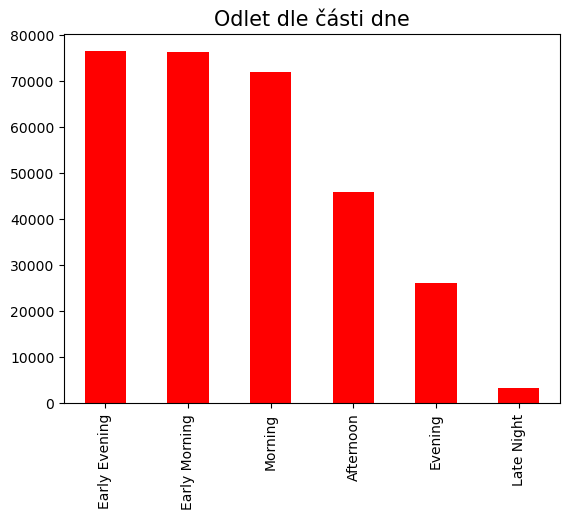

In [25]:
all1["dep_time_hour"].value_counts().plot(kind = "bar",cmap='flag')
plt.title('Odlet dle části dne',fontsize=15)
plt.show()

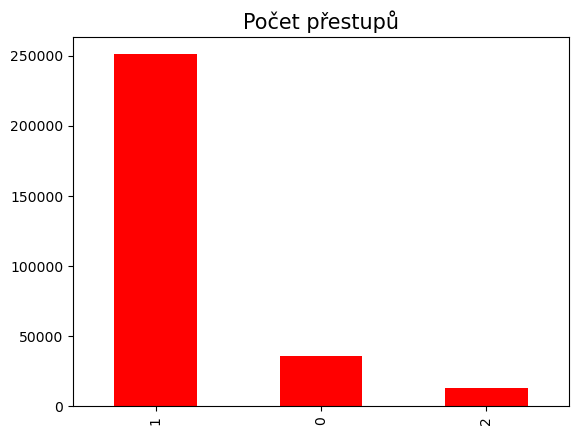

In [26]:
all1["stop"].value_counts().plot(kind = "bar",cmap='flag')
plt.title('Počet přestupů',fontsize=15)
plt.show()

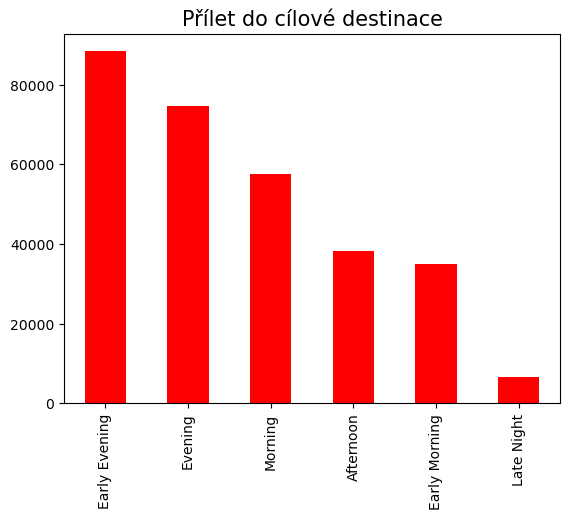

In [27]:
all1["arr_time_hour"].value_counts().plot(kind = "bar",cmap='flag')
plt.title('Přílet do cílové destinace',fontsize=15)
plt.show()

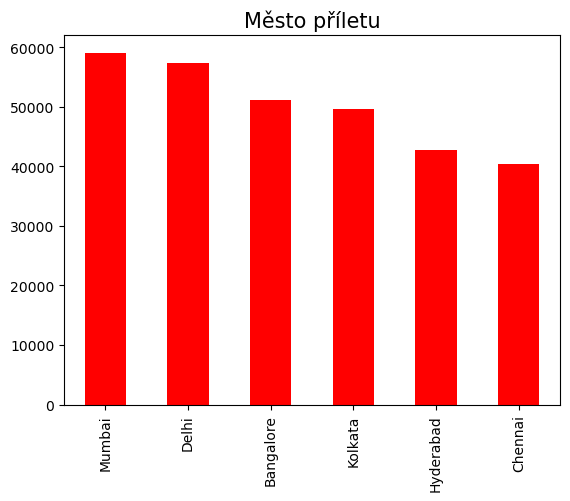

In [28]:
all1["to"].value_counts().plot(kind = "bar",cmap='flag')
plt.title('Město příletu',fontsize=15)
plt.show()

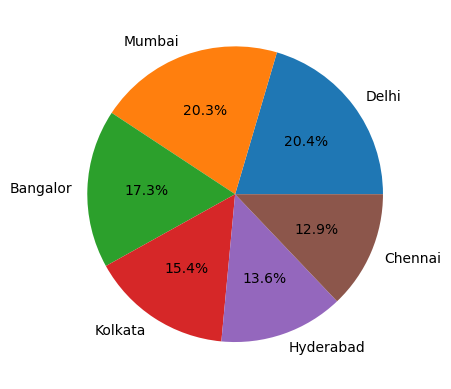

In [29]:
city = pd.DataFrame({'city':['Delhi','Mumbai','Bangalor','Kolkata','Hyderabad','Chennai'],'percentage':all1['from'].value_counts()/(complet['from'].count())*100})
plt.pie(city['percentage'],labels=city['city'],autopct='%1.1f%%')
plt.show()

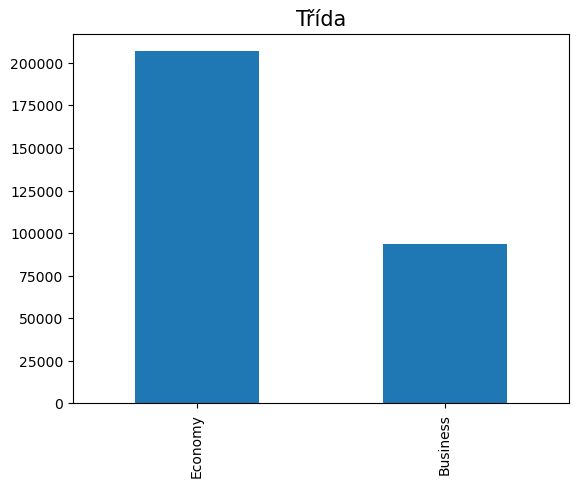

In [30]:
all1['class'].value_counts().plot(kind = "bar" )
plt.title('Třída',fontsize=15)
plt.show()

In [31]:
pd.pivot_table(data = all1,columns = "from",index = "to", values = "price")

from          Bangalore       Chennai         Delhi     Hyderabad  \
to                                                                  
Bangalore           NaN  25081.850454  17880.216315  21326.780071   
Chennai    23321.850078           NaN  19369.881354  21848.065989   
Delhi      17723.313972  18981.863948           NaN  17242.639473   
Hyderabad  21224.229701  21591.345404  17347.288379           NaN   
Kolkata    23498.234221  22669.932407  20566.409418  20823.893201   
Mumbai     23127.231376  22765.849647  19355.829812  20074.843585   

from            Kolkata        Mumbai  
to                                     
Bangalore  22744.808428  23147.873807  
Chennai    23660.361040  22781.899112  
Delhi      19422.354559  18725.320008  
Hyderabad  21500.011397  21004.046705  
Kolkata             NaN  22379.146723  
Mumbai     22078.883579           NaN

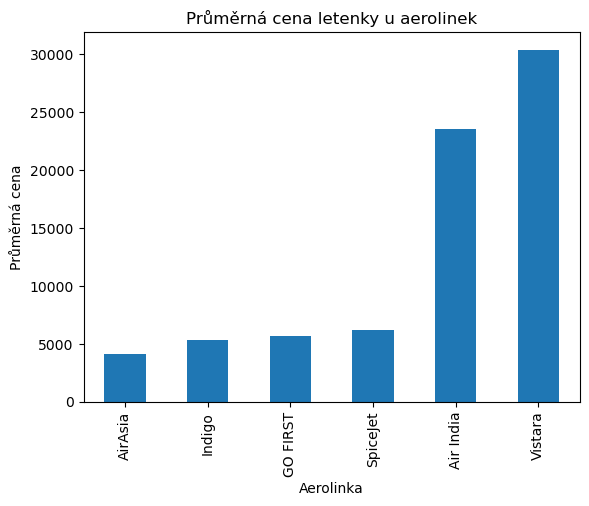

In [32]:
avarage_price = all1.groupby("airline")["price"].mean().sort_values()
avarage_price.plot(kind = "bar")
plt.ylabel("Průměrná cena")
plt.xlabel("Aerolinka")
plt.title("Průměrná cena letenky u aerolinek")
plt.show()

<AxesSubplot:xlabel='airline', ylabel='price'>

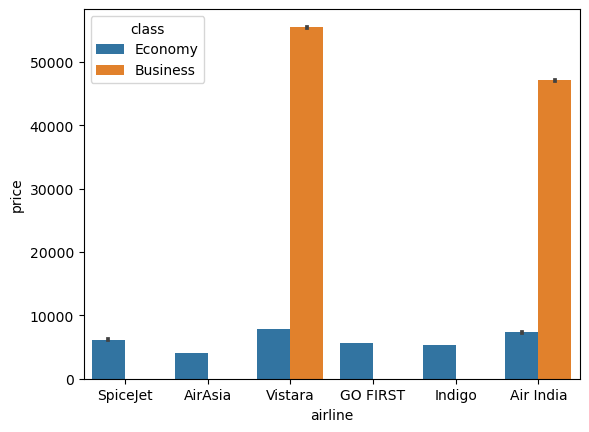

In [33]:
sns.barplot(data=all1, x='airline', y='price', hue='class')

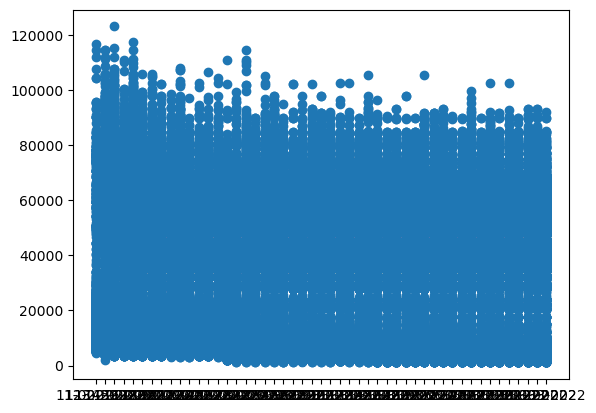

In [34]:
all1.corr()['price']
plt.scatter(all1['date'],all1['price'])
plt.show()

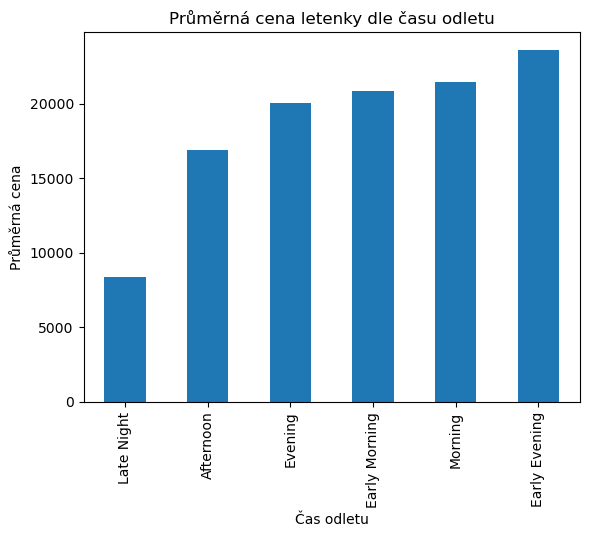

In [35]:
avarage_price = all1.groupby("dep_time_hour")["price"].mean().sort_values()
avarage_price.plot(kind = "bar")
plt.ylabel("Průměrná cena")
plt.xlabel("Čas odletu")
plt.title("Průměrná cena letenky dle času odletu")
plt.show()

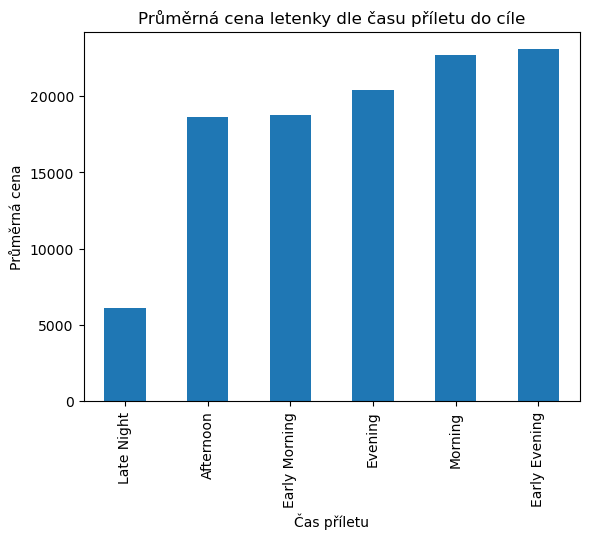

In [36]:
avarage_price = all1.groupby("arr_time_hour")["price"].mean().sort_values()
avarage_price.plot(kind = "bar")
plt.ylabel("Průměrná cena")
plt.xlabel("Čas příletu")
plt.title("Průměrná cena letenky dle času příletu do cíle")
plt.show()

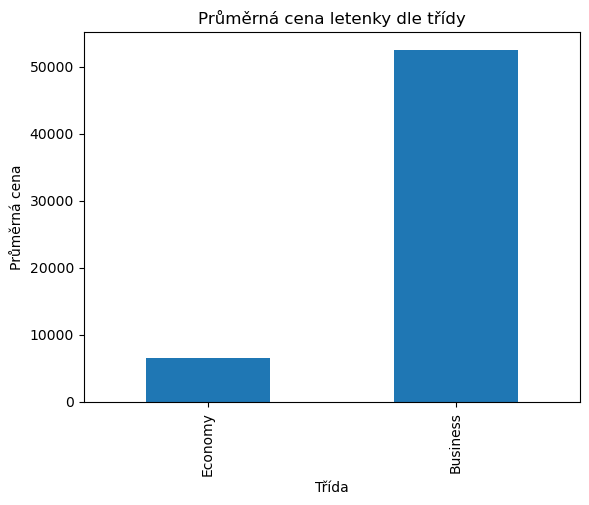

In [37]:
avarage_price = all1.groupby("class")["price"].mean().sort_values()
avarage_price.plot(kind = "bar")
plt.ylabel("Průměrná cena")
plt.xlabel("Třída")
plt.title("Průměrná cena letenky dle třídy")
plt.show()

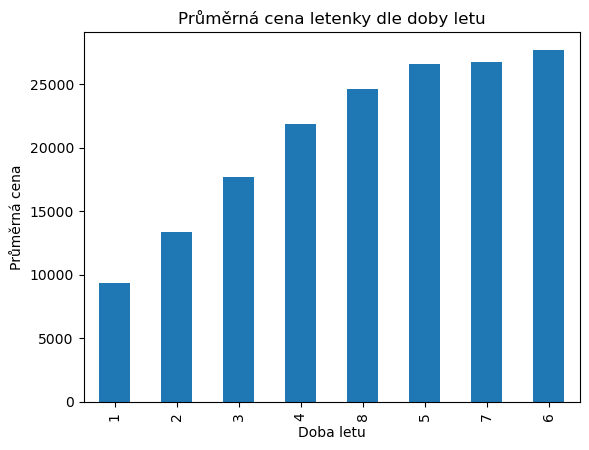

In [38]:
all2 = complet.copy()

all2["flight_duration"] = all2["flight_duration"].mask(all2["flight_duration"] <= 180, 1)
all2["flight_duration"] = all2["flight_duration"].mask((all2["flight_duration"] > 180) & (all2["flight_duration"] <= 360), 2)
all2["flight_duration"] = all2["flight_duration"].mask((all2["flight_duration"] > 360) & (all2["flight_duration"] <= 540), 3)
all2["flight_duration"] = all2["flight_duration"].mask((all2["flight_duration"] > 540) & (all2["flight_duration"] <= 720), 4)
all2["flight_duration"] = all2["flight_duration"].mask((all2["flight_duration"] > 720) & (all2["flight_duration"] <= 900), 5)
all2["flight_duration"] = all2["flight_duration"].mask((all2["flight_duration"] > 900) & (all2["flight_duration"] <= 1080), 6)
all2["flight_duration"] = all2["flight_duration"].mask((all2["flight_duration"] > 1080) & (all2["flight_duration"] <= 1260), 7)
all2["flight_duration"] = all2["flight_duration"].mask(all2["flight_duration"] > 1260, 8)
all2["flight_duration"].unique()

avarage_price = all2.groupby("flight_duration")["price"].mean().sort_values()
avarage_price.plot(kind = "bar")
plt.ylabel("Průměrná cena")
plt.xlabel("Doba letu")
plt.title("Průměrná cena letenky dle doby letu")
plt.show()

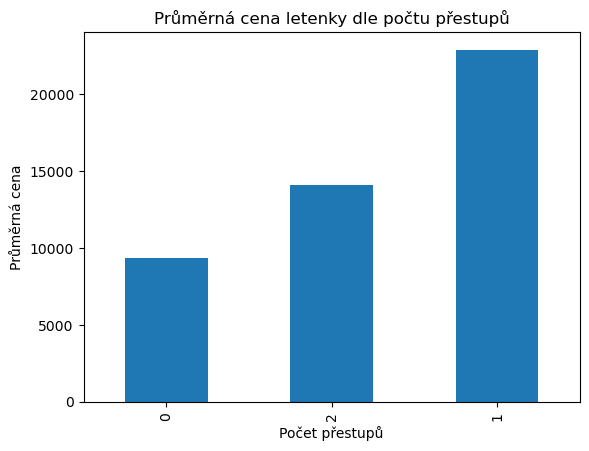

In [39]:
avarage_price = all1.groupby("stop")["price"].mean().sort_values()
avarage_price.plot(kind = "bar")
plt.ylabel("Průměrná cena")
plt.xlabel("Počet přestupů")
plt.title("Průměrná cena letenky dle počtu přestupů")
plt.show()

In [40]:
all1["dep_time_hour"].replace({'Late Night':"0",'Early Morning':"1",'Morning':"2",
                               'Afternoon':"3",'Early Evening':"4",'Evening':"5"},inplace=True)
all1["arr_time_hour"].replace({'Late Night':"0",'Early Morning':"1",'Morning':"2",
                          'Afternoon':"3",'Early Evening':"4",'Evening':"5"},inplace=True)

all1["class"].replace({"Economy":0,"Business":1},inplace=True)

all1["dep_time_hour"] = all1["dep_time_hour"].astype(int)
all1["arr_time_hour"] = all1["arr_time_hour"].astype(int)

all1

date   airline     from  stop         to  price  class  \
0      11-02-2022  SpiceJet    Delhi     0     Mumbai   5953      0   
1      11-02-2022  SpiceJet    Delhi     0     Mumbai   5953      0   
2      11-02-2022   AirAsia    Delhi     0     Mumbai   5956      0   
3      11-02-2022   Vistara    Delhi     0     Mumbai   5955      0   
4      11-02-2022   Vistara    Delhi     0     Mumbai   5955      0   
...           ...       ...      ...   ...        ...    ...    ...   
93482  31-03-2022   Vistara  Chennai     1  Hyderabad  69265      1   
93483  31-03-2022   Vistara  Chennai     1  Hyderabad  77105      1   
93484  31-03-2022   Vistara  Chennai     1  Hyderabad  79099      1   
93485  31-03-2022   Vistara  Chennai     1  Hyderabad  81585      1   
93486  31-03-2022   Vistara  Chennai     1  Hyderabad  81585      1   

      flight_code  arr_time_hour  dep_time_hour  flight_duration  
0         SG-8709              5              4              130  
1         SG-8157              1              1              140  
2          I5-764              1              0              130  
3          UK-995              2              2              135  
4          UK-963              2              1              140  
...           ...            ...            ...              ...  
93482      UK-822              4              2              605  
93483      UK-826              5              2              625  
93484      UK-832              4              1              830  
93485      UK-828              4              1              600  
93486      UK-822              4              2              605  

[300150 rows x 11 columns]

In [41]:
all1["price"].describe().transpose()

count    300150.000000
mean      20888.709812
std       22697.332828
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [42]:
all1.corr()

stop     price     class  arr_time_hour  dep_time_hour  \
stop             1.000000  0.119629  0.001008       0.046406      -0.066155   
price            0.119629  1.000000  0.937862       0.046202       0.027559   
class            0.001008  0.937862  1.000000       0.022702       0.034466   
arr_time_hour    0.046406  0.046202  0.022702       1.000000      -0.134722   
dep_time_hour   -0.066155  0.027559  0.034466      -0.134722       1.000000   
flight_duration  0.468013  0.204217  0.138702      -0.080112       0.134955   

                 flight_duration  
stop                    0.468013  
price                   0.204217  
class                   0.138702  
arr_time_hour          -0.080112  
dep_time_hour           0.134955  
flight_duration         1.000000

<AxesSubplot:>

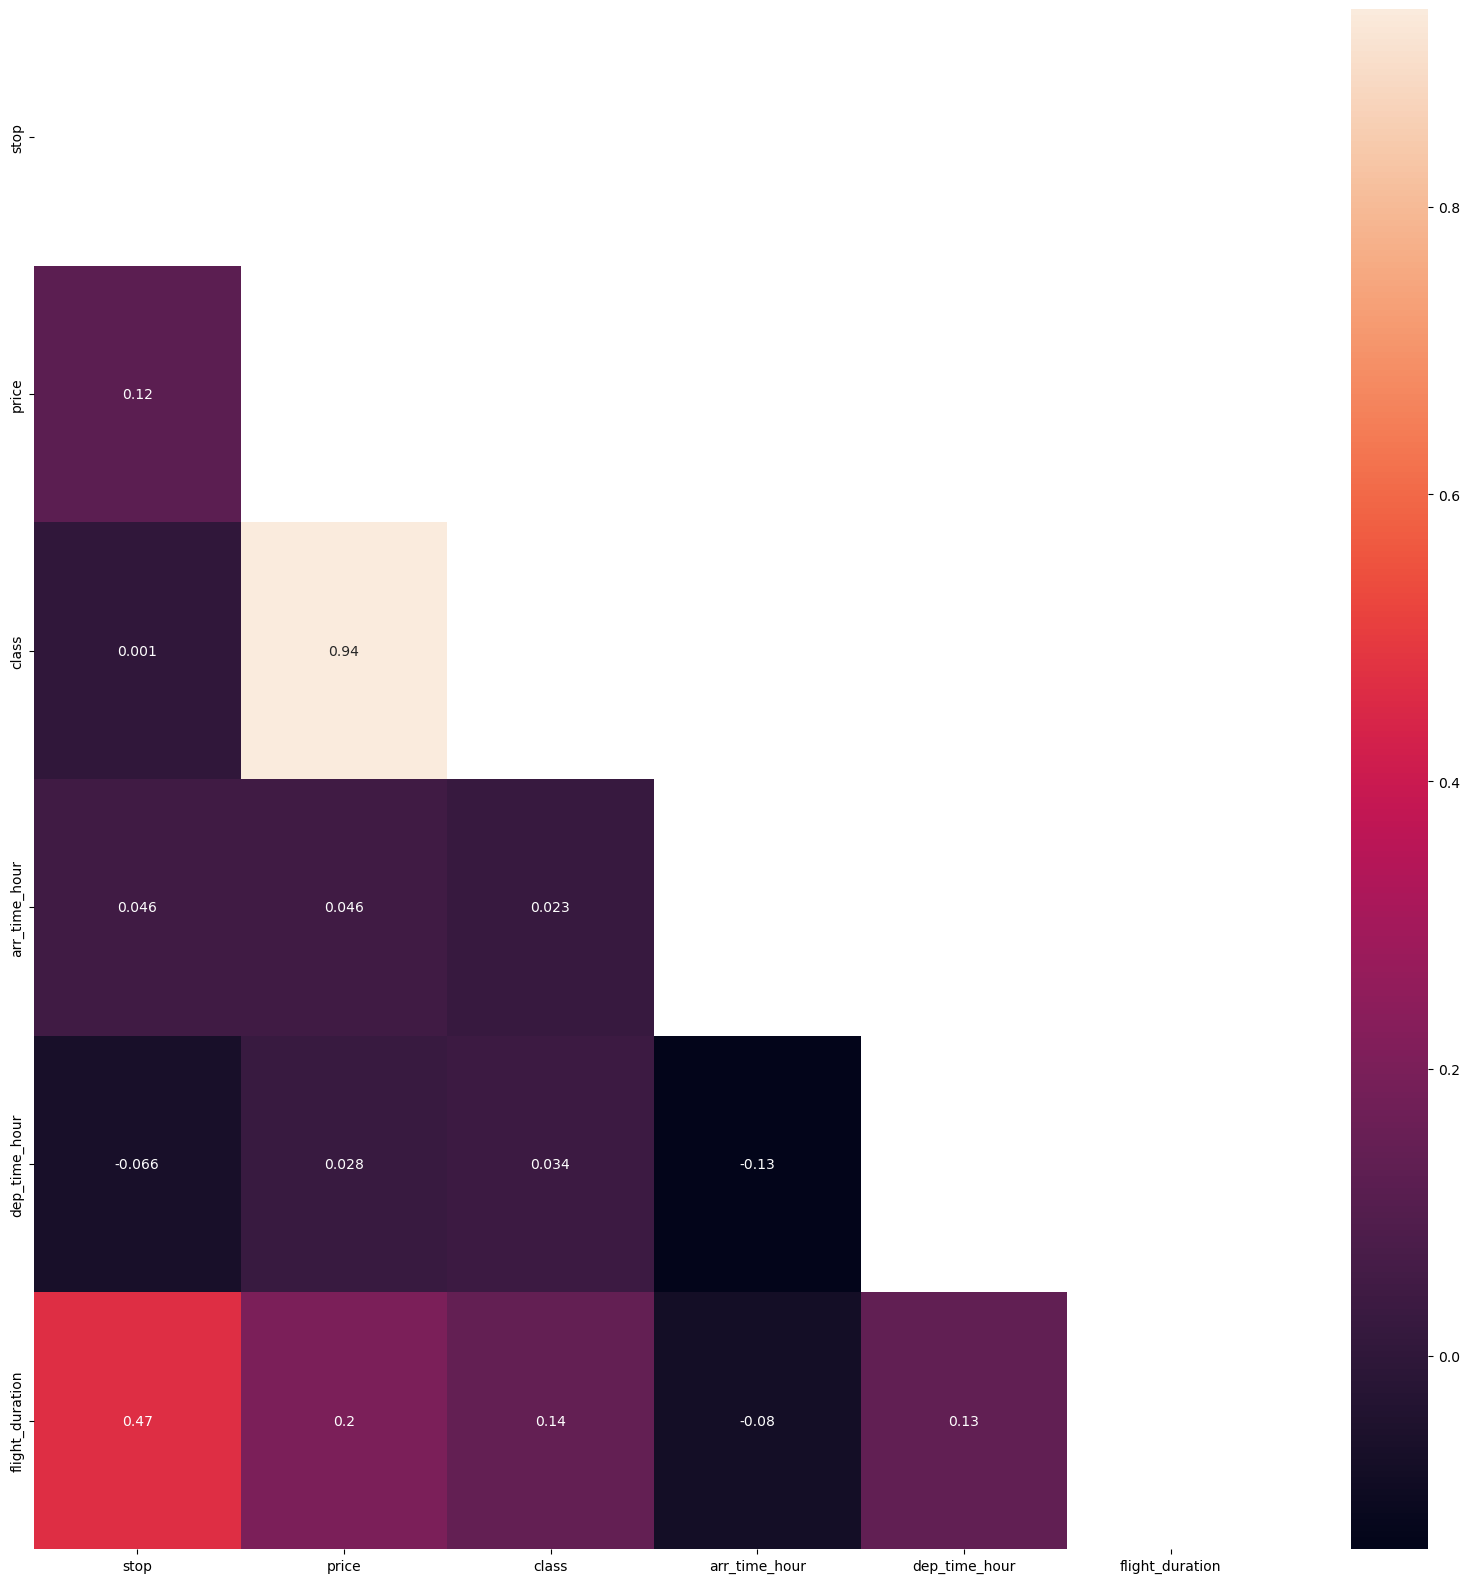

In [43]:
corr = all1.corr(method = 'pearson')

matrix = np.triu(corr)

plt.figure(figsize = (20,20))
sns.heatmap(corr, annot = True, mask = matrix)

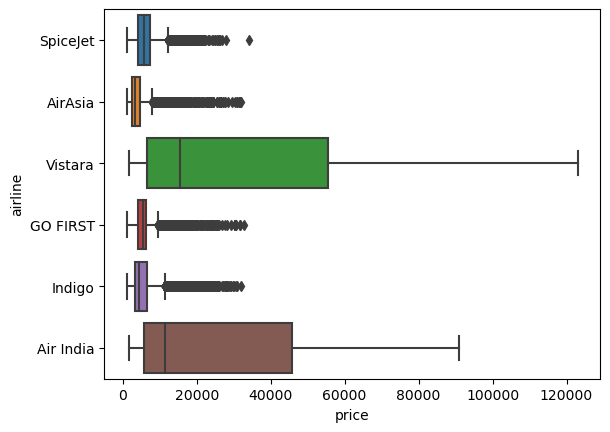

In [44]:
sns.boxplot(data=all1, x="price", y="airline" )
plt.show()

In [45]:
values = list(all1.groupby('flight_duration').mean()['price'].values)
duration = [i for i,all1 in all1.groupby('flight_duration')]
px.scatter(x = duration,y = values)

In [46]:
values = list(all1.groupby('date').mean()['price'].values)
date = [i for i,all1 in all1.groupby('date')]
px.scatter(x = date,y = values)

In [47]:
values = list(all1.groupby('flight_code').mean()['price'].values)
flight = [i for i,all1 in all1.groupby('flight_code')]
px.scatter(x = flight,y = values)

In [48]:
def airline_price(df,col):
    df[col].plot(kind = "hist", bins = 50, alpha =1)
    sns.despine(right = True, left = False, bottom = False)
    plt.title("Distribuce ceny - economy a business")
    return plt.show()

def class_pie(df,col):
    plt.pie(df[col].value_counts(), labels=['Economy','Business'],autopct='%1.1f%%')
    plt.legend(title = "Třída")
    plt.show() 

def price_class(df):
    df[col].plot(kind = "hist", bins = 50)
    return plt.show()

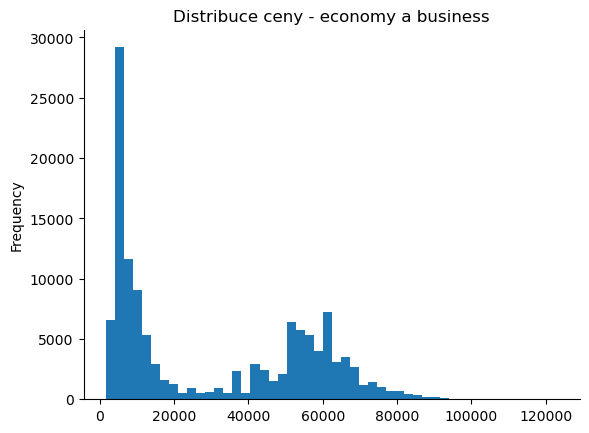

In [49]:
vistara = all1[all1["airline"] == "Vistara"]

airline_price(vistara, "price")

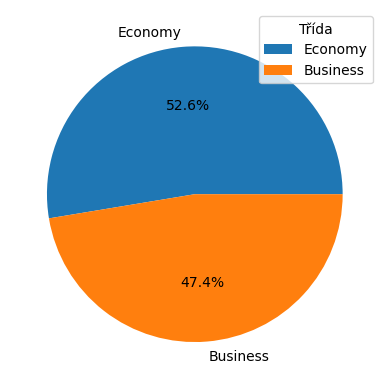

In [50]:
class_pie(vistara, "class")

In [51]:
vistara.describe().transpose()

count          mean           std     min     25%  \
stop             127853.0      0.969950      0.359923     0.0     1.0   
price            127853.0  30395.520457  25637.125607  1714.0  6412.0   
class            127853.0      0.473849      0.499318     0.0     0.0   
arr_time_hour    127853.0      3.388188      1.306149     1.0     2.0   
dep_time_hour    127853.0      2.679921      1.350800     1.0     1.0   
flight_duration  127853.0    799.589763    406.627041    60.0   510.0   

                     50%      75%       max  
stop                 1.0      1.0       2.0  
price            15543.0  55377.0  123071.0  
class                0.0      1.0       1.0  
arr_time_hour        4.0      4.0       5.0  
dep_time_hour        2.0      4.0       5.0  
flight_duration    750.0   1020.0    2825.0

In [52]:
table = vistara.groupby(["class"]).mean().sort_values("price", ascending=False).round(2)
table.reset_index(inplace=True)
table

class  stop     price  arr_time_hour  dep_time_hour  flight_duration
0      1  0.93  55477.37           3.38           2.72           791.92
1      0  1.00   7806.94           3.40           2.65           806.50

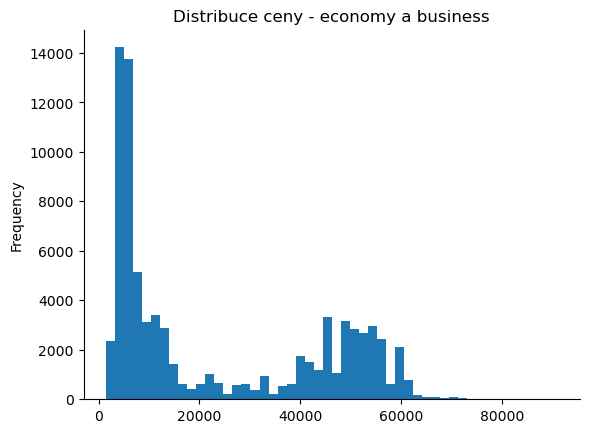

In [53]:
air_india = all1[all1["airline"] == "Air India"]

airline_price(air_india, "price")

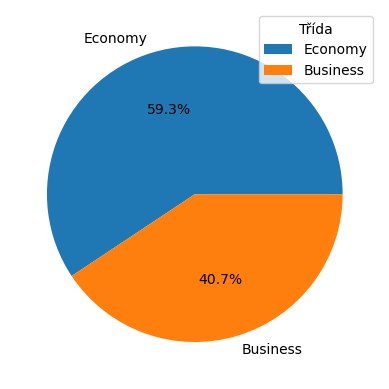

In [54]:
class_pie(air_india, "class")

In [55]:
air_india.describe().transpose()

count          mean           std     min     25%      50%  \
stop             80891.0      0.963778      0.347747     0.0     1.0      1.0   
price            80891.0  23506.610130  20904.922506  1526.0  5623.0  11520.0   
class            80891.0      0.406683      0.491218     0.0     0.0      0.0   
arr_time_hour    80891.0      3.261859      1.428665     0.0     2.0      4.0   
dep_time_hour    80891.0      2.659579      1.338868     0.0     1.0      3.0   
flight_duration  80891.0    930.244218    456.803024    60.0   605.0    900.0   

                     75%      max  
stop                 1.0      2.0  
price            45693.0  90970.0  
class                1.0      1.0  
arr_time_hour        5.0      5.0  
dep_time_hour        4.0      5.0  
flight_duration   1300.0   2990.0

In [56]:
table = air_india.groupby(["class"]).mean().sort_values("price", ascending=False).round(2)
table.reset_index(inplace=True)
table

class  stop     price  arr_time_hour  dep_time_hour  flight_duration
0      1  0.91  47130.75           3.30           2.71           878.07
1      0  1.00   7313.68           3.24           2.62           966.01

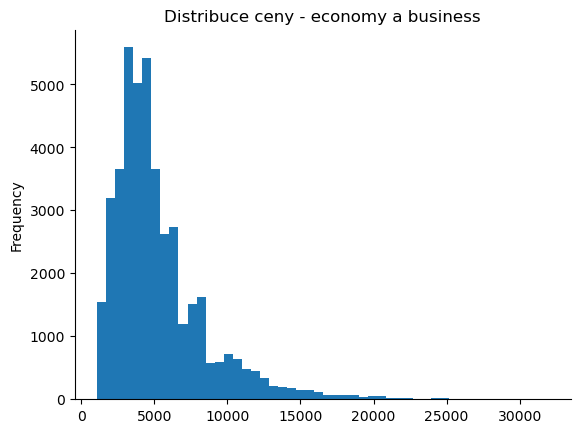

In [57]:
indigo = all1[all1["airline"] == "Indigo"]

airline_price(indigo, "price")

In [58]:
indigo.describe().transpose()

count         mean          std     min     25%     50%  \
stop             43120.0     0.757004     0.467102     0.0     0.0     1.0   
price            43120.0  5324.216303  3268.894831  1105.0  3219.0  4453.0   
class            43120.0     0.000000     0.000000     0.0     0.0     0.0   
arr_time_hour    43120.0     3.392254     1.417910     0.0     2.0     4.0   
dep_time_hour    43120.0     2.517324     1.288676     0.0     2.0     2.0   
flight_duration  43120.0   347.709416   166.152741    50.0   175.0   360.0   

                    75%      max  
stop                1.0      2.0  
price            6489.0  31952.0  
class               0.0      0.0  
arr_time_hour       5.0      5.0  
dep_time_hour       3.0      5.0  
flight_duration   465.0    925.0

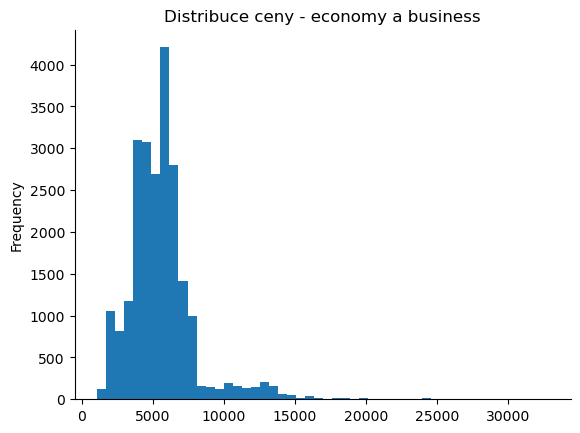

In [59]:
go = all1[all1["airline"] == "GO FIRST"]

airline_price(go, "price")

In [60]:
go.describe().transpose()

count         mean          std     min     25%     50%  \
stop             23177.0     0.878500     0.376649     0.0     1.0     1.0   
price            23177.0  5651.930578  2513.669305  1105.0  4205.0  5336.0   
class            23177.0     0.000000     0.000000     0.0     0.0     0.0   
arr_time_hour    23177.0     3.269750     1.625191     0.0     2.0     4.0   
dep_time_hour    23177.0     2.551668     1.402454     0.0     1.0     3.0   
flight_duration  23177.0   525.246969   240.962430    60.0   360.0   530.0   

                    75%      max  
stop                1.0      2.0  
price            6324.0  32803.0  
class               0.0      0.0  
arr_time_hour       5.0      5.0  
dep_time_hour       4.0      5.0  
flight_duration   705.0   1350.0

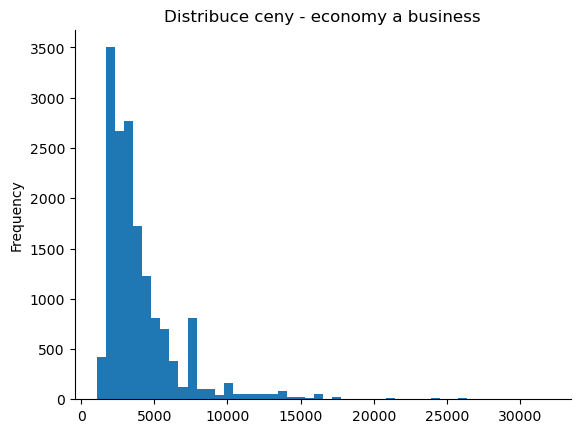

In [61]:
asia = all1[all1["airline"] == "AirAsia"]

airline_price(asia, "price")

In [62]:
asia.describe().transpose()

count         mean          std     min     25%     50%  \
stop             16098.0     0.988322     0.539074     0.0     1.0     1.0   
price            16098.0  4091.072742  2824.055172  1105.0  2361.0  3276.0   
class            16098.0     0.000000     0.000000     0.0     0.0     0.0   
arr_time_hour    16098.0     2.669959     1.816546     0.0     1.0     3.0   
dep_time_hour    16098.0     2.769226     1.456705     0.0     2.0     3.0   
flight_duration  16098.0   536.489315   250.399807    55.0   355.0   560.0   

                    75%      max  
stop                1.0      2.0  
price            4589.0  31917.0  
class               0.0      0.0  
arr_time_hour       4.0      5.0  
dep_time_hour       4.0      5.0  
flight_duration   710.0   1175.0

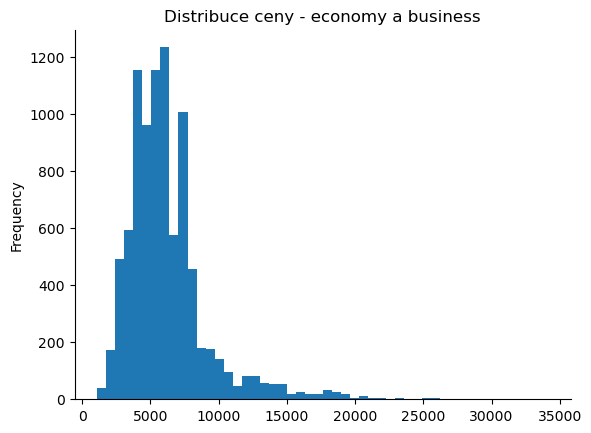

In [63]:
spice = all1[all1["airline"] == "SpiceJet"]

airline_price(spice, "price")

In [64]:
spice.describe().transpose()

count         mean          std     min     25%     50%  \
stop             9011.0     0.726778     0.445638     0.0     0.0     1.0   
price            9011.0  6179.278881  2999.630406  1106.0  4197.0  5654.0   
class            9011.0     0.000000     0.000000     0.0     0.0     0.0   
arr_time_hour    9011.0     3.219399     1.609739     0.0     2.0     4.0   
dep_time_hour    9011.0     2.699811     1.474722     0.0     1.0     3.0   
flight_duration  9011.0   754.769726   535.620477    60.0   170.0   720.0   

                    75%      max  
stop                1.0      1.0  
price            7412.0  34158.0  
class               0.0      0.0  
arr_time_hour       5.0      5.0  
dep_time_hour       4.0      5.0  
flight_duration  1265.0   1675.0

In [65]:
complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300150 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   date             300150 non-null  object
 1   airline          300150 non-null  object
 2   from             300150 non-null  object
 3   stop             300150 non-null  int32 
 4   to               300150 non-null  object
 5   price            300150 non-null  int64 
 6   class            300150 non-null  object
 7   flight_code      300150 non-null  object
 8   arr_time_hour    300150 non-null  string
 9   dep_time_hour    300150 non-null  string
 10  flight_duration  300150 non-null  int32 
dtypes: int32(2), int64(1), object(6), string(2)
memory usage: 25.2+ MB


In [66]:
complet["date"] = complet["date"].astype("string")

complet['date'] = complet['date'].str.replace("11-02", "02-11")
complet['date'] = complet['date'].str.replace("08-03", "03-08")
complet['date'] = complet['date'].str.replace("12-02", "02-12")
complet['date'] = complet['date'].str.replace("04-03", "03-04")
complet['date'] = complet['date'].str.replace("09-03", "03-09")
complet['date'] = complet['date'].str.replace("05-03", "03-05")
complet['date'] = complet['date'].str.replace("10-03", "03-10")
complet['date'] = complet['date'].str.replace("11-03", "03-11")
complet['date'] = complet['date'].str.replace("12-03", "03-12")
complet['date'] = complet['date'].str.replace("01-03", "03-01")
complet['date'] = complet['date'].str.replace("06-03", "03-06")
complet['date'] = complet['date'].str.replace("07-03", "03-07")

complet["date"] = pd.to_datetime(complet["date"])

complet['day'] = complet['date'].dt.day
complet['month'] = complet['date'].dt.month
complet['year'] = complet['date'].dt.year

complet = complet.drop(["date", "year"], axis = 1)

C:\Users\blizk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '13-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\blizk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '14-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\blizk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '15-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\blizk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '16-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\blizk\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '17-02-2022' in DD/MM/YYYY format. Pro

In [67]:
complet["arr_time_hour"] = complet["arr_time_hour"].astype(object)
complet["dep_time_hour"] = complet["dep_time_hour"].astype(object)

complet = complet.drop("flight_code", axis = 1)

complet = pd.get_dummies(complet, drop_first = True)

complet

stop  price  flight_duration  day  month  airline_AirAsia  \
0         0   5953              130   11      2                0   
1         0   5953              140   11      2                0   
2         0   5956              130   11      2                1   
3         0   5955              135   11      2                0   
4         0   5955              140   11      2                0   
...     ...    ...              ...  ...    ...              ...   
93482     1  69265              605   31      3                0   
93483     1  77105              625   31      3                0   
93484     1  79099              830   31      3                0   
93485     1  81585              600   31      3                0   
93486     1  81585              605   31      3                0   

       airline_GO FIRST  airline_Indigo  airline_SpiceJet  airline_Vistara  \
0                     0               0                 1                0   
1                     0               0                 1                0   
2                     0               0                 0                0   
3                     0               0                 0                1   
4                     0               0                 0                1   
...                 ...             ...               ...              ...   
93482                 0               0                 0                1   
93483                 0               0                 0                1   
93484                 0               0                 0                1   
93485                 0               0                 0                1   
93486                 0               0                 0                1   

       ...  arr_time_hour_Early Evening  arr_time_hour_Early Morning  \
0      ...                            0                            0   
1      ...                            0                            1   
2      ...                            0                            1   
3      ...                            0                            0   
4      ...                            0                            0   
...    ...                          ...                          ...   
93482  ...                            1                            0   
93483  ...                            0                            0   
93484  ...                            1                            0   
93485  ...                            1                            0   
93486  ...                            1                            0   

       arr_time_hour_Evening  arr_time_hour_Late Night  arr_time_hour_Morning  \
0                          1                         0                      0   
1                          0                         0                      0   
2                          0                         0                      0   
3                          0                         0                      1   
4                          0                         0                      1   
...                      ...                       ...                    ...   
93482                      0                         0                      0   
93483                      1                         0                      0   
93484                      0                         0                      0   
93485                      0                         0                      0   
93486                      0                         0                      0   

       dep_time_hour_Early Evening  dep_time_hour_Early Morning  \
0                                1                            0   
1                                0                            1   
2                                0                            0   
3                                0                            0   
4                                0                            1   
...          

In [68]:
complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300150 entries, 0 to 93486
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   stop                         300150 non-null  int32
 1   price                        300150 non-null  int64
 2   flight_duration              300150 non-null  int32
 3   day                          300150 non-null  int64
 4   month                        300150 non-null  int64
 5   airline_AirAsia              300150 non-null  uint8
 6   airline_GO FIRST             300150 non-null  uint8
 7   airline_Indigo               300150 non-null  uint8
 8   airline_SpiceJet             300150 non-null  uint8
 9   airline_Vistara              300150 non-null  uint8
 10  from_Chennai                 300150 non-null  uint8
 11  from_Delhi                   300150 non-null  uint8
 12  from_Hyderabad               300150 non-null  uint8
 13  from_Kolkata                 3

<AxesSubplot:>

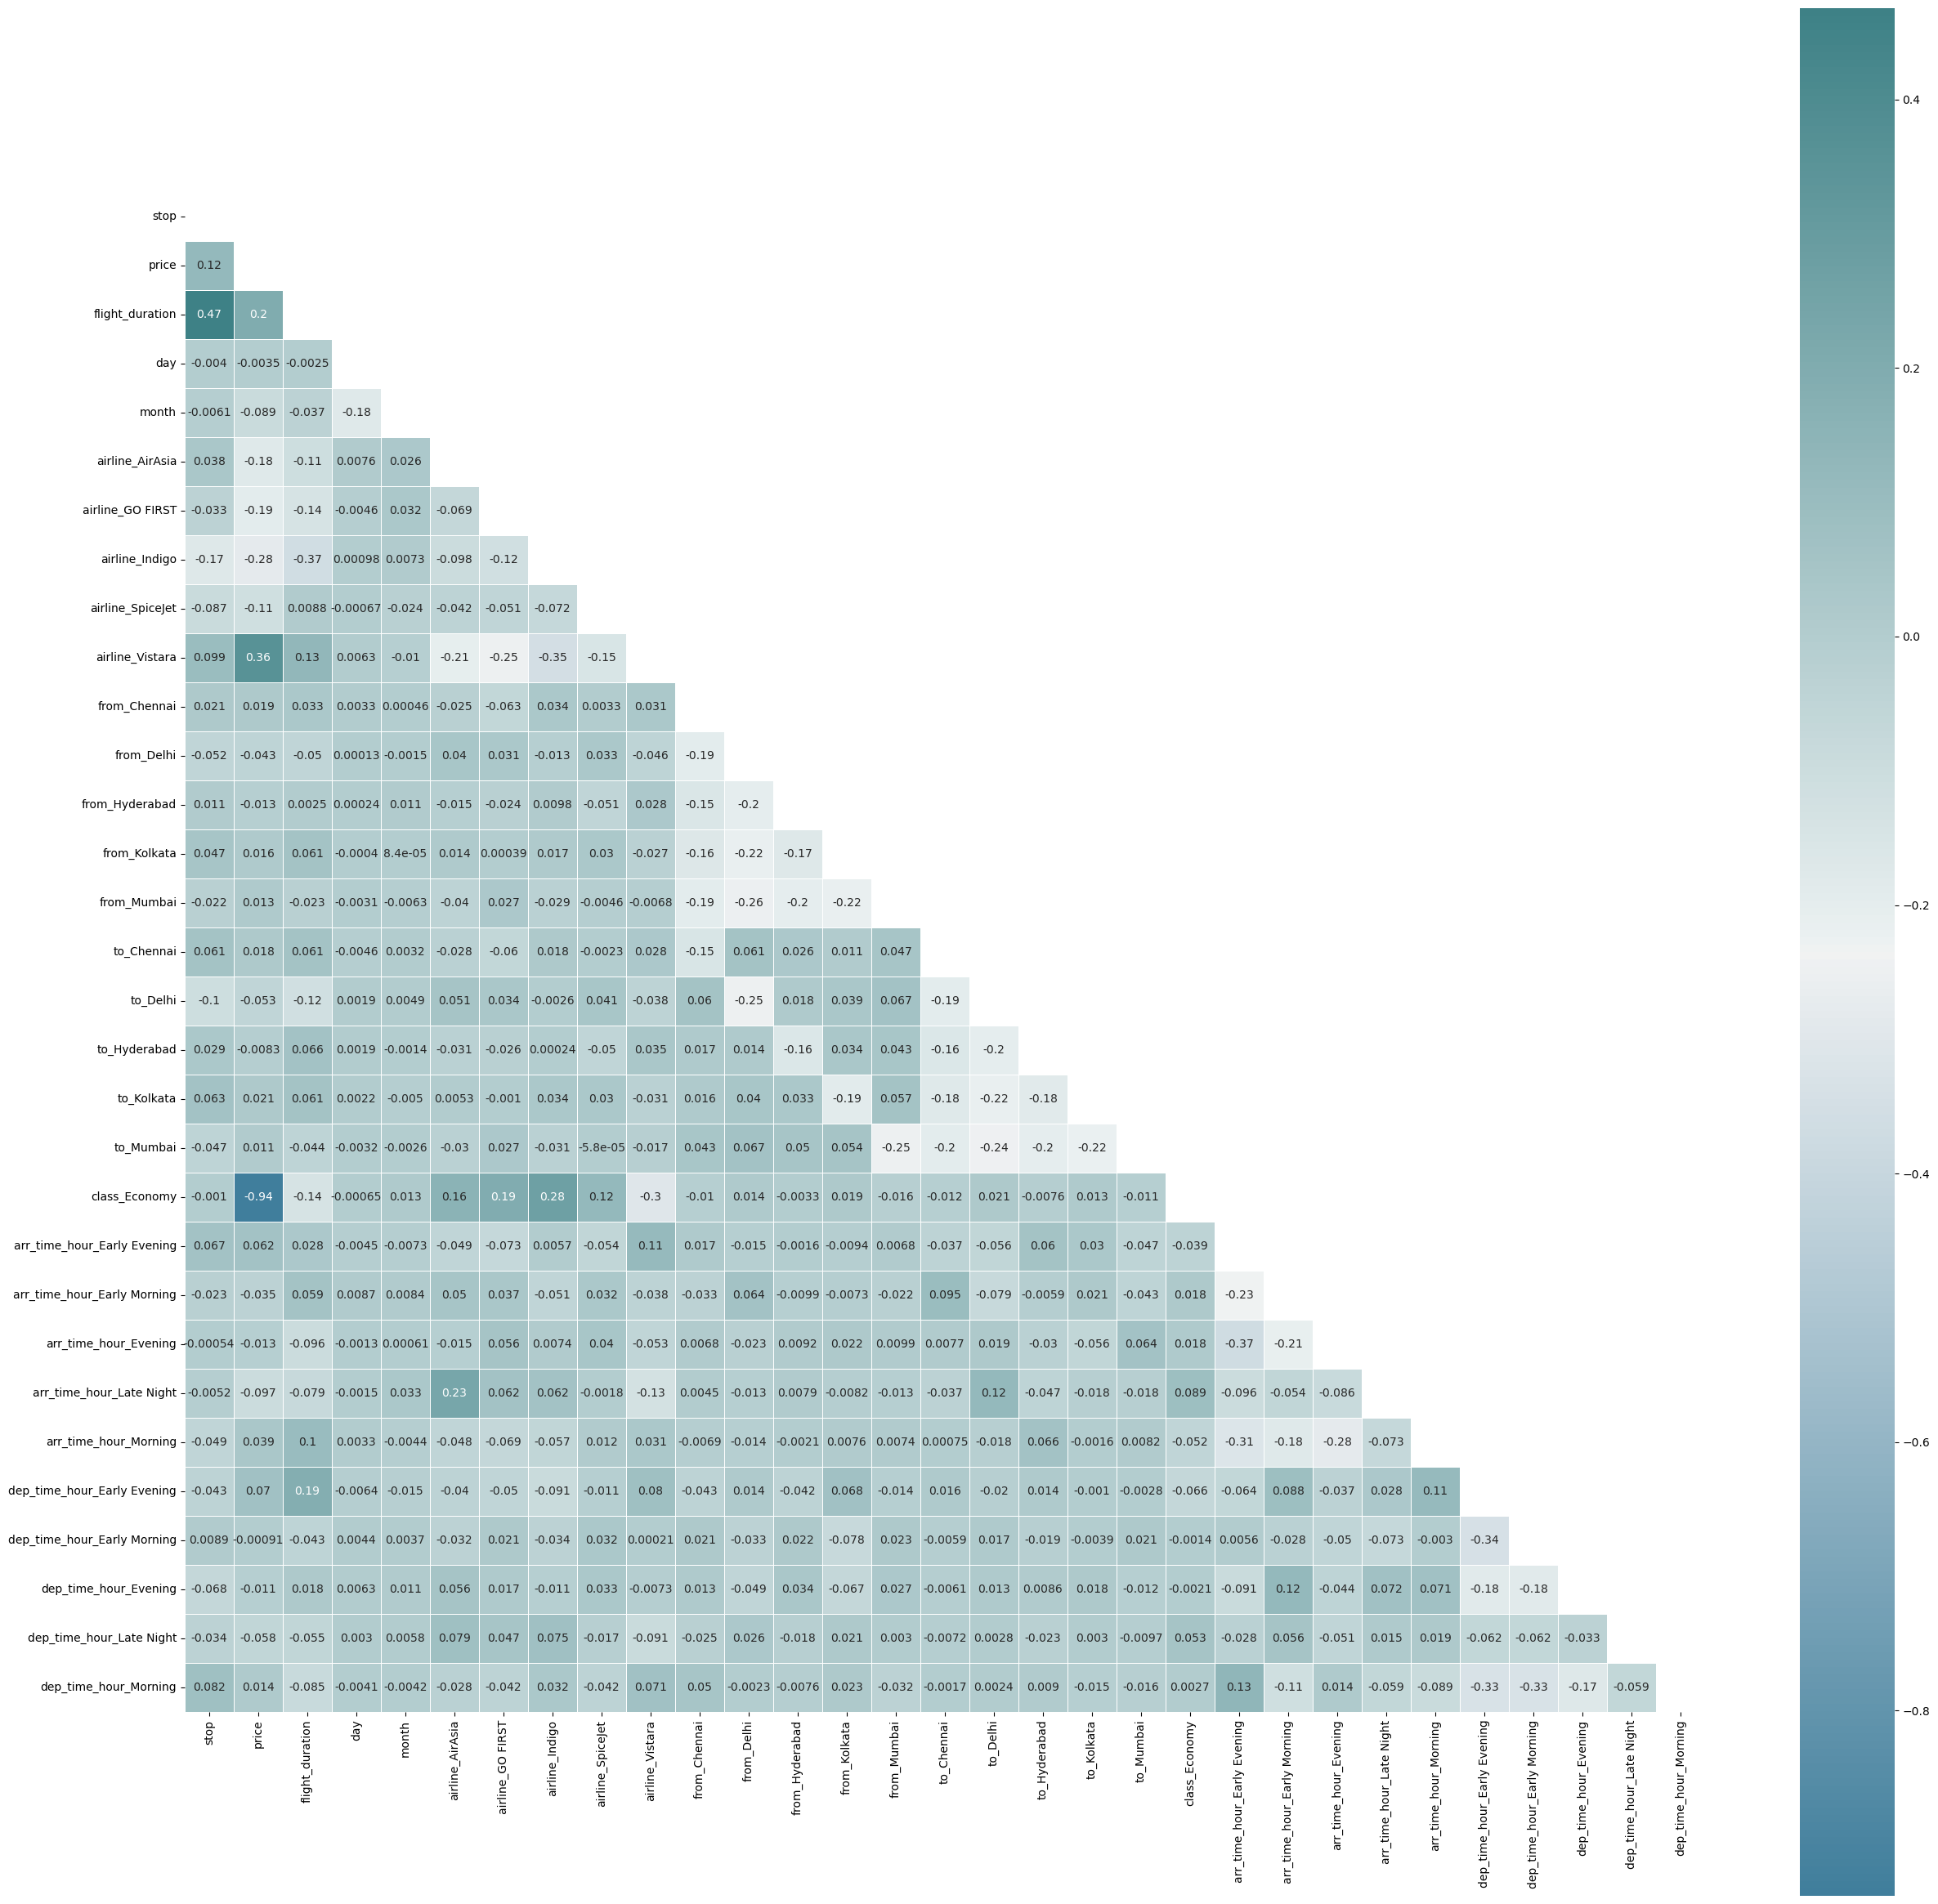

In [69]:
mask = np.triu(np.ones_like(complet.corr(), dtype=bool))
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(230, 200, as_cmap=True)

sns.heatmap(complet.corr(), annot=True, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": 1})

In [70]:
model1 = complet.copy()

x = model1.drop("price", axis = 1)
y = model1["price"]

In [71]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.33 , random_state= 42)

In [72]:
x_train.shape

(201100, 30)

In [73]:
x_test.shape

(99050, 30)

In [74]:
reg = LinearRegression()

In [75]:
reg.fit(x_train , y_train)

print(reg.score(x_train , y_train))

0.9093759609039704


In [76]:
coef = pd.DataFrame(reg.coef_ , model1.columns[:-1] , columns= ['coeficient'])
coef.sort_values("coeficient" , ascending= False)

coeficient
stop                          5719.644645
airline_SpiceJet              3970.343686
airline_Indigo                2197.169320
airline_GO FIRST              2131.629185
airline_AirAsia               1799.330310
from_Hyderabad                1397.126000
to_Hyderabad                  1337.705768
dep_time_hour_Evening          604.993494
arr_time_hour_Early Morning    586.529837
class_Economy                  542.960886
arr_time_hour_Morning          429.484127
arr_time_hour_Evening          382.371875
dep_time_hour_Late Night       366.504744
dep_time_hour_Early Evening    309.203016
dep_time_hour_Early Morning    155.398302
to_Kolkata                      34.114546
price                            1.358329
flight_duration                -49.353684
arr_time_hour_Late Night       -88.300340
airline_Vistara               -173.832992
from_Kolkata                  -247.738211
from_Mumbai                   -280.826762
month                         -307.823271
arr_time_hour_Early Evening   -654.752188
to_Chennai                   -1466.734928
from_Chennai                 -1557.700569
from_Delhi                   -1662.458889
to_Delhi                     -1806.557275
day                          -3614.005357
to_Mumbai                   -45175.021376

In [77]:
y_pred = reg.predict(x_test)
pred = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
pred

Y_test        Y_pred
27133     7366   3885.640597
36185    49613  50117.100377
203604   11069   9480.858070
81663    60160  55327.288095
90376     4500  -1756.138298
...        ...           ...
10797     7425   9644.629001
27772     3999   -816.885026
147748    5760   8705.826259
145315    5385   5373.762335
78590    11129  10934.495531

[99050 rows x 2 columns]

In [78]:
reg_score = r2_score(y_test , y_pred)
reg_score

0.9098172982125059

In [79]:
mse = mean_squared_error (y_test , y_pred)
print (mse)

46372974.00470002


In [80]:
mae = mean_absolute_error (y_test , y_pred)
print (mae)

4507.718923318837


In [81]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(x_train)
est = sm.OLS(y_train , X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 6.725e+04
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:50:34   Log-Likelihood:            -2.0610e+06
No. Observations:              201100   AIC:                         4.122e+06
Df Residuals:                  201069   BIC:                         4.122e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

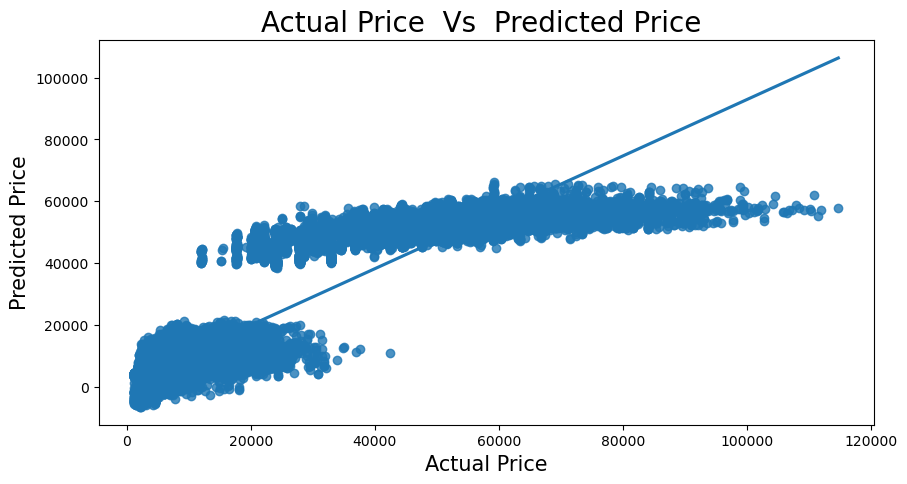

In [82]:
plt.figure(figsize = (10,5))
sns.regplot(x = "Y_test", y = "Y_pred", data = pred)
plt.title('Actual Price  Vs  Predicted Price ',fontsize = 20)
plt.xlabel('Actual Price', fontsize = 15)
plt.ylabel('Predicted Price',fontsize = 15)
plt.show()

<AxesSubplot:xlabel='flight_duration'>

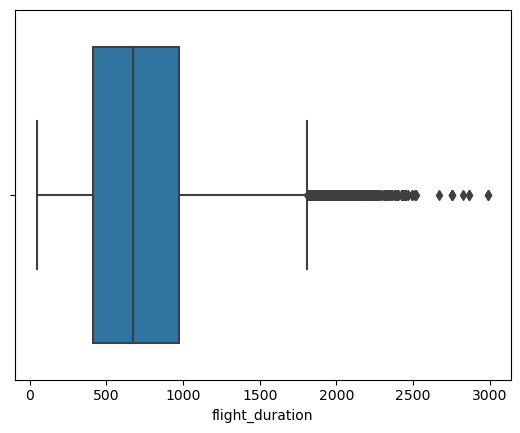

In [83]:
sns.boxplot(x = complet['flight_duration'])

In [84]:
print("Počet outlierů ve sloupci:", complet[complet['flight_duration']>1700].count(), sep = '\n')

Počet outlierů ve sloupci:
stop                           3747
price                          3747
flight_duration                3747
day                            3747
month                          3747
airline_AirAsia                3747
airline_GO FIRST               3747
airline_Indigo                 3747
airline_SpiceJet               3747
airline_Vistara                3747
from_Chennai                   3747
from_Delhi                     3747
from_Hyderabad                 3747
from_Kolkata                   3747
from_Mumbai                    3747
to_Chennai                     3747
to_Delhi                       3747
to_Hyderabad                   3747
to_Kolkata                     3747
to_Mumbai                      3747
class_Economy                  3747
arr_time_hour_Early Evening    3747
arr_time_hour_Early Morning    3747
arr_time_hour_Evening          3747
arr_time_hour_Late Night       3747
arr_time_hour_Morning          3747
dep_time_hour_Early Evening    3747
d

In [85]:
complet.shape

(300150, 31)

In [86]:
(3747/300150)*100

1.248375812093953

Text(0, 0.5, 'price')

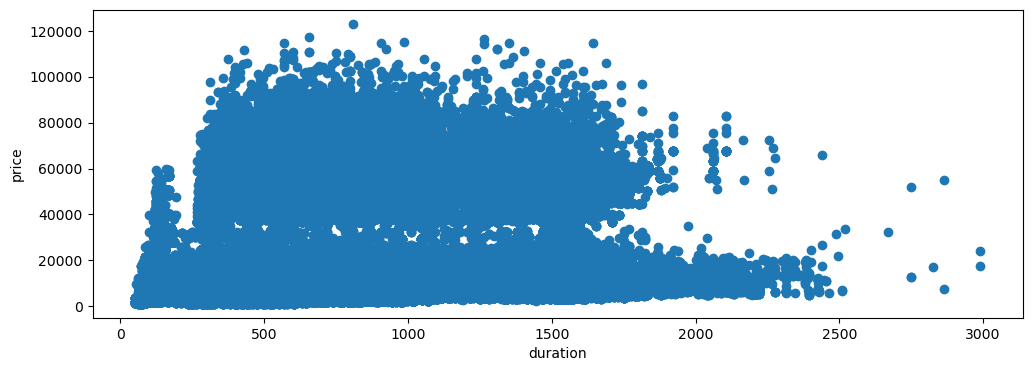

In [87]:
fig , ax = plt.subplots(figsize = (12,4))
ax.scatter(complet['flight_duration'] , complet['price'])
ax.set_xlabel ("duration")
ax.set_ylabel ("price")

In [88]:
print ("'duration' feature most Outliers:", complet[complet['flight_duration']>2500].count(), sep = '\n')

'duration' feature most Outliers:
stop                           12
price                          12
flight_duration                12
day                            12
month                          12
airline_AirAsia                12
airline_GO FIRST               12
airline_Indigo                 12
airline_SpiceJet               12
airline_Vistara                12
from_Chennai                   12
from_Delhi                     12
from_Hyderabad                 12
from_Kolkata                   12
from_Mumbai                    12
to_Chennai                     12
to_Delhi                       12
to_Hyderabad                   12
to_Kolkata                     12
to_Mumbai                      12
class_Economy                  12
arr_time_hour_Early Evening    12
arr_time_hour_Early Morning    12
arr_time_hour_Evening          12
arr_time_hour_Late Night       12
arr_time_hour_Morning          12
dep_time_hour_Early Evening    12
dep_time_hour_Early Morning    12
dep_time_hour_

<AxesSubplot:xlabel='price'>

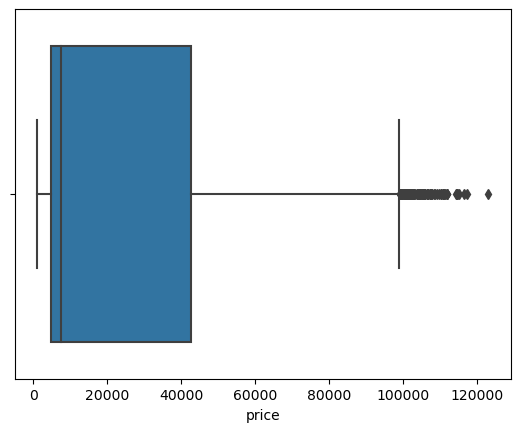

In [89]:
sns.boxplot(x = complet['price'])

In [90]:
print ("Počet outlierů u ceny: ", complet[complet['price']>90000].count(), sep = '\n')

Počet outlierů u ceny: 
stop                           461
price                          461
flight_duration                461
day                            461
month                          461
airline_AirAsia                461
airline_GO FIRST               461
airline_Indigo                 461
airline_SpiceJet               461
airline_Vistara                461
from_Chennai                   461
from_Delhi                     461
from_Hyderabad                 461
from_Kolkata                   461
from_Mumbai                    461
to_Chennai                     461
to_Delhi                       461
to_Hyderabad                   461
to_Kolkata                     461
to_Mumbai                      461
class_Economy                  461
arr_time_hour_Early Evening    461
arr_time_hour_Early Morning    461
arr_time_hour_Evening          461
arr_time_hour_Late Night       461
arr_time_hour_Morning          461
dep_time_hour_Early Evening    461
dep_time_hour_Early Morning    

In [91]:
complet.shape

(300150, 31)

In [92]:
(461/300138)*100

0.15359601250091623

Text(0, 0.5, 'price')

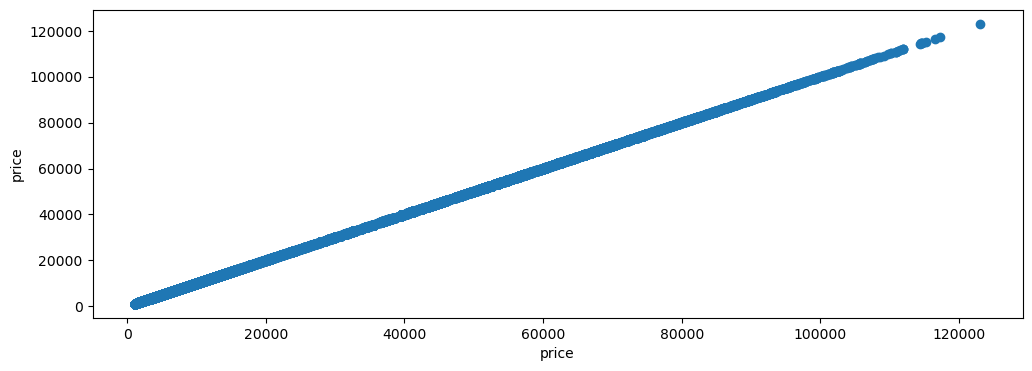

In [93]:
fig , ax = plt.subplots(figsize = (12,4))
ax.scatter(complet['price'] , complet['price'])
ax.set_xlabel ("price")
ax.set_ylabel ("price")

In [94]:
print ("Počet outlierů: ", complet[complet['price']>115000].count(), sep = '\n')

Počet outlierů: 
stop                           4
price                          4
flight_duration                4
day                            4
month                          4
airline_AirAsia                4
airline_GO FIRST               4
airline_Indigo                 4
airline_SpiceJet               4
airline_Vistara                4
from_Chennai                   4
from_Delhi                     4
from_Hyderabad                 4
from_Kolkata                   4
from_Mumbai                    4
to_Chennai                     4
to_Delhi                       4
to_Hyderabad                   4
to_Kolkata                     4
to_Mumbai                      4
class_Economy                  4
arr_time_hour_Early Evening    4
arr_time_hour_Early Morning    4
arr_time_hour_Evening          4
arr_time_hour_Late Night       4
arr_time_hour_Morning          4
dep_time_hour_Early Evening    4
dep_time_hour_Early Morning    4
dep_time_hour_Evening          4
dep_time_hour_Late Night  

price    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

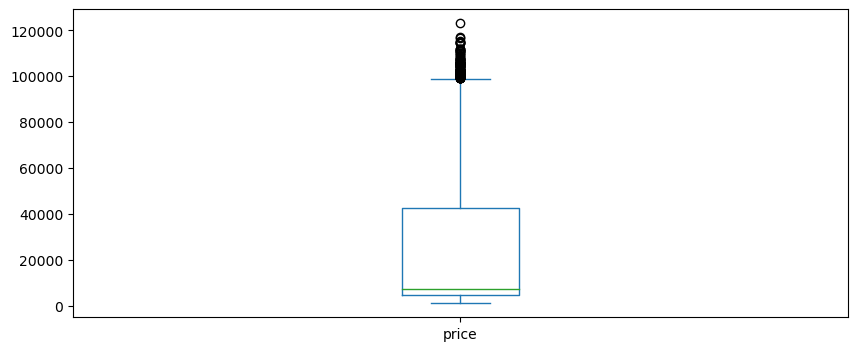

In [95]:
complet["price"].plot(kind = "box", figsize = (10,4), subplots = True)

In [96]:
complet.corr().unstack().sort_values().drop_duplicates()

price                        class_Economy                 -0.937862
arr_time_hour_Early Evening  arr_time_hour_Evening         -0.371517
flight_duration              airline_Indigo                -0.365940
airline_Indigo               airline_Vistara               -0.352829
dep_time_hour_Early Morning  dep_time_hour_Early Evening   -0.341614
                                                              ...   
airline_AirAsia              arr_time_hour_Late Night       0.232307
airline_Indigo               class_Economy                  0.275466
airline_Vistara              price                          0.360809
flight_duration              stop                           0.468013
stop                         stop                           1.000000
Length: 466, dtype: float64

In [97]:
complet.corr()

stop     price  flight_duration       day  \
stop                         1.000000  0.119629         0.468013 -0.004008   
price                        0.119629  1.000000         0.204217 -0.003464   
flight_duration              0.468013  0.204217         1.000000 -0.002530   
day                         -0.004008 -0.003464        -0.002530  1.000000   
month                       -0.006097 -0.088592        -0.036900 -0.176635   
airline_AirAsia              0.038272 -0.176182        -0.108545  0.007563   
airline_GO FIRST            -0.033291 -0.194191        -0.139433 -0.004588   
airline_Indigo              -0.172135 -0.280872        -0.365940  0.000981   
airline_SpiceJet            -0.087293 -0.114014         0.008776 -0.000669   
airline_Vistara              0.098736  0.360809         0.132445  0.006311   
from_Chennai                 0.021373  0.018758         0.033062  0.003278   
from_Delhi                  -0.052328 -0.043261        -0.049691  0.000130   
from_Hyderabad               0.011180 -0.012914         0.002540  0.000240   
from_Kolkata                 0.046820  0.016145         0.061149 -0.000402   
from_Mumbai                 -0.022459  0.013228        -0.023306 -0.003135   
to_Chennai                   0.060858  0.018490         0.061291 -0.004582   
to_Delhi                    -0.104567 -0.052513        -0.115414  0.001900   
to_Hyderabad                 0.029092 -0.008282         0.065761  0.001884   
to_Kolkata                   0.062738  0.020969         0.061444  0.002215   
to_Mumbai                   -0.046855  0.010527        -0.043886 -0.003158   
class_Economy               -0.001008 -0.937862        -0.138702 -0.000650   
arr_time_hour_Early Evening  0.066766  0.061908         0.027601 -0.004501   
arr_time_hour_Early Morning -0.023127 -0.034514         0.059064  0.008712   
arr_time_hour_Evening       -0.000538 -0.013029        -0.095686 -0.001250   
arr_time_hour_Late Night    -0.005213 -0.096754        -0.079195 -0.001513   
arr_time_hour_Morning       -0.049238  0.038716         0.104978  0.003310   
dep_time_hour_Early Evening -0.042673  0.070003         0.186115 -0.006425   
dep_time_hour_Early Morning  0.008921 -0.000914        -0.043265  0.004426   
dep_time_hour_Evening       -0.068479 -0.011223         0.018058  0.006345   
dep_time_hour_Late Night    -0.033569 -0.058236        -0.055450  0.002952   
dep_time_hour_Morning        0.082355  0.013792        -0.085362 -0.004052   

                                month  airline_AirAsia  airline_GO FIRST  \
stop                        -0.006097         0.038272         -0.033291   
price                       -0.088592        -0.176182         -0.194191   
flight_duration             -0.036900        -0.108545         -0.139433   
day                         -0.176635         0.007563         -0.004588   
month                        1.000000         0.025611          0.031773   
airline_AirAsia              0.025611         1.000000         -0.068865   
airline_GO FIRST             0.031773        -0.068865          1.000000   
airline_Indigo               0.007285        -0.097507         -0.118483   
airline_SpiceJet            -0.023725        -0.041882         -0.050892   
airline_Vistara             -0.010427        -0.205071         -0.249188   
from_Chennai                 0.000455        -0.025488         -0.063288   
from_Delhi                  -0.001468         0.040230          0.030556   
from_Hyderabad               0.010897        -0.014854         -0.023508   
from_Kolkata                 0.000084         0.014048          0.000386   
from_Mumbai                 -0.006339        -0.040084          0.026869   
to_Chennai                   0.003198        -0.028133         -0.059597   
to_Delhi                     0.004947         0.051023          0.034306   
to_Hyderabad                -0.001409        -0.030963         -0.025801   
to_Kolkata                  -0.004995         0.005270         -0.001009   
to_Mumbai       

In [98]:
complet = complet[complet['flight_duration']<1700]
complet = complet[complet['price']<90000]

In [99]:
model2 = complet.copy()

x = model2.drop("price", axis = 1)
y = model2["price"]

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.33 , random_state= 42)

reg2 = LinearRegression()

In [100]:
x_train.shape

(198091, 30)

In [101]:
x_test.shape

(97568, 30)

In [102]:
reg2.fit(x_train, x_train)

print(reg.score(x_train , y_train))

0.9126319144183886


In [103]:
y_pred = reg.predict(x_test)
pred = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
pred

Y_test        Y_pred
110834    7813   9237.997558
82703    60160  52206.819581
202564    9216   9361.410512
43666    54684  50515.173698
59190     2124    255.208768
...        ...           ...
28252    49725  57583.612716
91811     4028   4161.371143
199829    5042   7068.254228
22978    51372  51677.453998
33339     2098  -5183.713963

[97568 rows x 2 columns]

In [104]:
reg_score = r2_score(y_test , y_pred)
reg_score

0.9120891707400108

In [105]:
mse = mean_squared_error (y_test , y_pred)
print(mse)

44789835.78584453


In [106]:
mae = mean_absolute_error (y_test , y_pred)
print (mae)

4481.727776447143


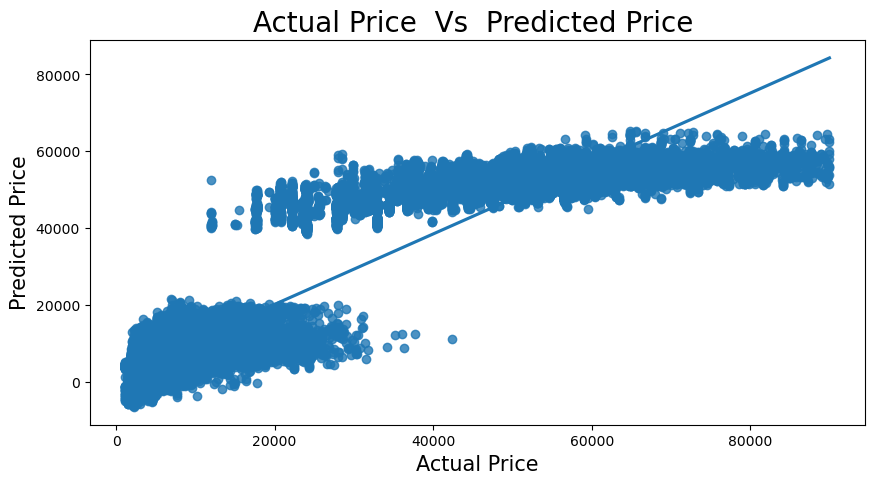

In [107]:
plt.figure(figsize=(10,5))
sns.regplot(x="Y_test",y="Y_pred",data=pred)
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [108]:
x = complet.drop("price", axis = 1)
y = complet["price"]

In [109]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
X_important = selector.fit_transform(x, y)
mask = selector.get_support()
important_feature_names = x.columns[mask]
print(important_feature_names)

Index(['from_Delhi', 'from_Hyderabad', 'from_Mumbai', 'class_Economy'], dtype='object')


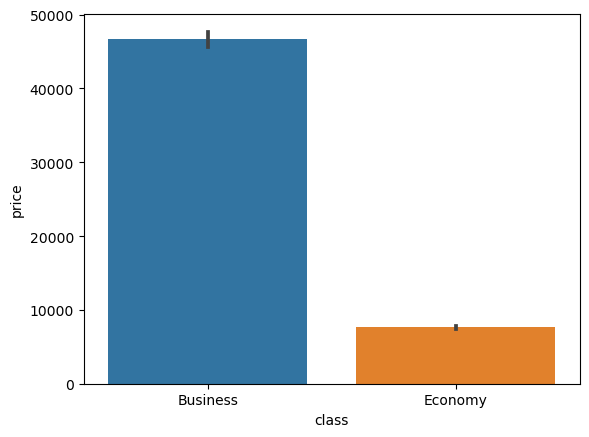

In [110]:
cleaned = cleaned[(cleaned["airline"] == "Vistara") | (cleaned["airline"] == "Air_India")]
bus_eco = cleaned.groupby(["class", "flight" ]).mean()
bus_eco = bus_eco.drop("Unnamed: 0", axis = 1)

bus_eco = bus_eco.reset_index()

sns.barplot(x="class", y="price", data=bus_eco)
plt.show()

In [111]:
bus = cleaned[(cleaned["class"] == "Business")]
eco = cleaned[(cleaned["class"] == "Economy")]

bus = bus.drop(["Unnamed: 0", "duration", "days_left", "airline", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class"], axis = 1)
eco = eco.drop(["Unnamed: 0", "duration", "airline", "days_left", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class"], axis = 1)

clean = bus.merge(eco, how = "left", on = "flight")

clean = clean.groupby(["flight"]).mean()

clean["average_diff_per_flight"] = clean["price_x"] - clean["price_y"]
clean["average_diff_per_flight_perc"] = clean["price_x"] / clean["price_y"]

clean

price_x      price_y  average_diff_per_flight  \
flight                                                       
AI-401  48058.403922  7518.945148             40539.458774   
AI-402  52583.321477  8395.415730             44187.905747   
AI-403  37054.638889  7898.531250             29156.107639   
AI-406  44118.333333  8007.430556             36110.902778   
AI-407  36924.090909  4965.600000             31958.490909   
...              ...          ...                      ...   
UK-988  64436.149254  7071.857143             57364.292111   
UK-993  54710.149123  6224.652747             48485.496376   
UK-994  63022.573574  7192.028007             55830.545567   
UK-995  55981.911765  6751.474708             49230.437057   
UK-996  65919.234168  7048.294719             58870.939449   

        average_diff_per_flight_perc  
flight                                
AI-401                      6.391642  
AI-402                      6.263337  
AI-403                      4.691333  
AI-406                      5.509674  
AI-407                      7.435978  
...                              ...  
UK-988                      9.111631  
UK-993                      8.789269  
UK-994                      8.762838  
UK-995                      8.291805  
UK-996                      9.352508  

[295 rows x 4 columns]

<AxesSubplot:xlabel='flight', ylabel='average_diff_per_flight_perc'>

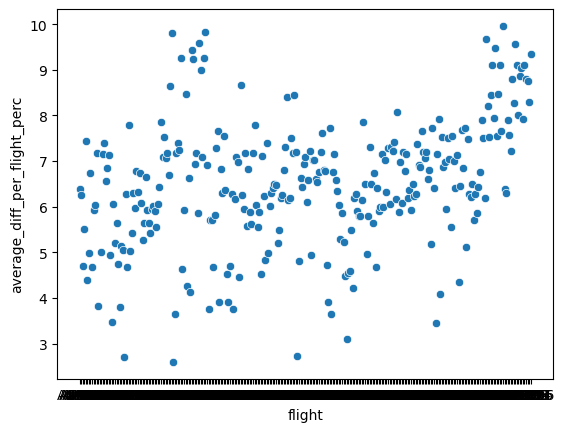

In [112]:
sns.scatterplot(data = clean["average_diff_per_flight_perc"])

<AxesSubplot:xlabel='flight'>

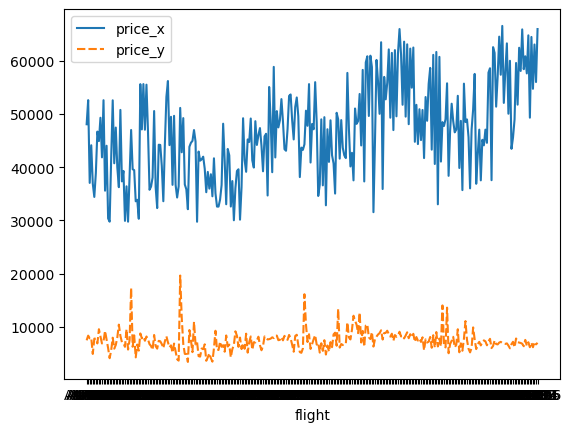

In [113]:
sns.lineplot(data=clean[['price_x', 'price_y']])

In [114]:
test_eco = complet.copy()
test_eco = test_eco[test_eco["class_Economy"] == 1]

x = test_eco.drop("price", axis = 1)
y = test_eco["price"]

In [115]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.33 , random_state= 42)

reg_test = LinearRegression()
reg_test.fit(x_train, x_train)

print(reg.score(x_train , y_train))

0.05420502265593774


In [116]:
y_pred = reg.predict(x_test)
pred = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
pred

Y_test        Y_pred
101601    5771   5913.990034
175735    2056   2904.283609
127731    7958  12469.215478
112865    5871   7234.621431
22328    12150   7824.404078
...        ...           ...
119692    4792   8958.035538
45137    10418   6956.931089
75578     2901  -2107.713495
97371     7212  12897.334783
196389    6437  14673.820727

[67151 rows x 2 columns]

In [117]:
mse = mean_squared_error (y_test , y_pred)
print(mse)

12697378.859504085


In [118]:
mae = mean_absolute_error (y_test , y_pred)
print (mae)

2734.837531205068


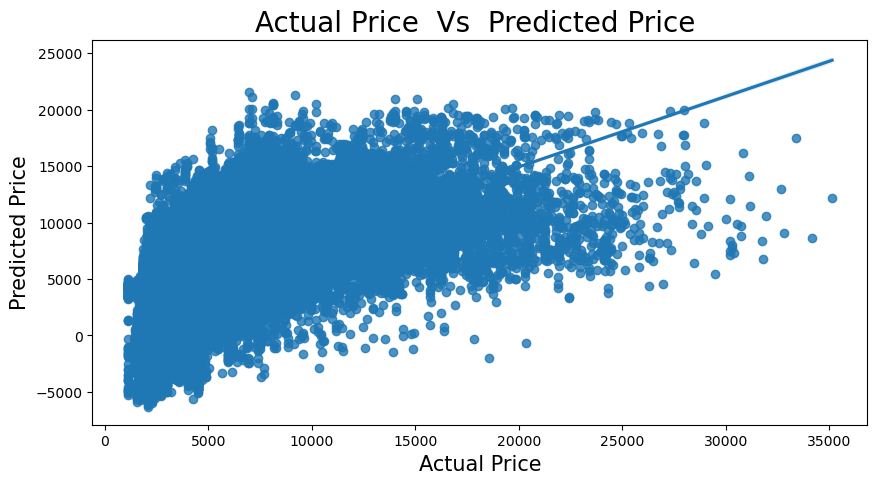

In [119]:
plt.figure(figsize=(10,5))
sns.regplot(x="Y_test",y="Y_pred",data=pred)
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [120]:
modeldcr = DecisionTreeRegressor(max_depth=5, min_samples_split=10)
modelrfr = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
modelXGR = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 42)
modelRE=Ridge(alpha = 0.9)
modelLO=Lasso(alpha=0.1)

In [121]:
models = complet.copy()

x = models.drop("price", axis = 1)
y = models["price"]

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.33 , random_state= 42)

In [122]:
modeldcr.fit(x_train, y_train)
modelrfr.fit(x_train, y_train)
modelXGR.fit(x_train, y_train)
modelRE.fit(x_train, y_train)
modelLO.fit(x_train, y_train)

Lasso(alpha=0.1)

In [123]:
y_pred = modeldcr.predict(x_test)    
print('Model Name: ', modeldcr)
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(r2_score(y_test, y_pred),6))
r_squared = round(r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Model Name:  DecisionTreeRegressor(max_depth=5, min_samples_split=10)
Mean Absolute Error (MAE): 3164.587
Mean Squared Error (MSE): 28378312.494
Root Mean Squared Error (RMSE): 5327.13
R2_score: 0.944301
Adj R Square:  0.944295


In [124]:
y_pred = modelrfr.predict(x_test)    
print('Model Name: ', modelrfr)
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(r2_score(y_test, y_pred),6))
r_squared = round(r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Model Name:  RandomForestRegressor(max_depth=10, random_state=42)
Mean Absolute Error (MAE): 2372.964
Mean Squared Error (MSE): 17513463.394
Root Mean Squared Error (RMSE): 4184.909
R2_score: 0.965626
Adj R Square:  0.965623


In [125]:
y_pred = modelXGR.predict(x_test)    
print('Model Name: ', modelXGR)
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(r2_score(y_test, y_pred),6))
r_squared = round(r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Mean Absolute Error (MAE): 2659.875
Mean Squared Error (MSE): 20769683.983
Root Mean Squared Error (RMSE): 4557.377
R2_score: 0.959234
Adj R Square:  0.95923


In [126]:
y_pred = modelRE.predict(x_test)    
print('Model Name: ', modelRE)
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(r2_score(y_test, y_pred),6))
r_squared = round(r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Model Name:  Ridge(alpha=0.9)
Mean Absolute Error (MAE): 4464.471
Mean Squared Error (MSE): 44777616.99
Root Mean Squared Error (RMSE): 6691.608
R2_score: 0.912113
Adj R Square:  0.912104


In [127]:
y_pred = modelLO.predict(x_test)    
print('Model Name: ', modelLO)
print('Mean Absolute Error (MAE):', round(mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(r2_score(y_test, y_pred),6))
r_squared = round(r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 4464.248
Mean Squared Error (MSE): 44777774.585
Root Mean Squared Error (RMSE): 6691.62
R2_score: 0.912113
Adj R Square:  0.912104


In [128]:
#grid_params = {"min_samples_split":[1,2,3,4,5],
 #              "min_samples_leaf":[1,2,3,4,5],
  #             "max_depth":[2,4,6,8,10],
   #            "n_estimators":[10,30,50,70,100], 
    #          "criterion": ["squared_error", "absolute_error"]}

#grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid_params,n_jobs =-1, verbose = 3)

#grid.fit(x_train,y_train)

In [129]:
# RFR - vybráno dle nejlepších parametrů

rfr = complet.copy()
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=rfr.merge(out,left_index=True,right_index=True)

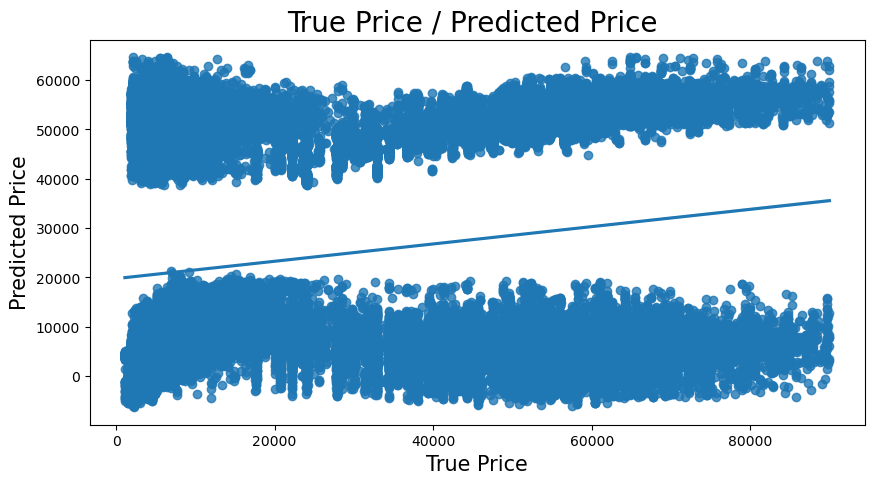

In [130]:
plt.figure(figsize=(10,5))
sns.regplot(x = 'price',y = 'Price_pred',data=result)
plt.title('True Price / Predicted Price ',fontsize=20)
plt.xlabel('True Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [131]:
# ANN

early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

model = Sequential()

model.add(Dense(units= 32, kernel_initializer= 'uniform', activation = 'relu', input_dim = 30))

model.add(Dense(units= 16, kernel_initializer= 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units= 8, kernel_initializer= 'uniform', activation = 'relu'))
model.add(Dropout(0.12))
model.add(Dense(units= 4, kernel_initializer= 'uniform', activation = 'relu'))

model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'linear'))

model.compile(optimizer = 'adam', loss ='mean_squared_error', metrics = ['mse'])

In [132]:
nn = complet.copy()

x = nn.drop("price", axis = 1)
y = nn["price"]

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.33 , random_state= 42)

In [133]:
# Train NN

history = model.fit(x_train, y_train, batch_size = 295, epochs = 150, callbacks=[early_stopping],
                     validation_split=0.3)

Epoch 1/150
471/471 [==============================] - 8s 7ms/step - loss: 714633728.0000 - mse: 714633728.0000 - val_loss: 514372320.0000 - val_mse: 514372320.0000
Epoch 2/150
471/471 [==============================] - 3s 6ms/step - loss: 556795840.0000 - mse: 556795840.0000 - val_loss: 512287968.0000 - val_mse: 512287968.0000
Epoch 3/150
471/471 [==============================] - 3s 6ms/step - loss: 553209920.0000 - mse: 553209920.0000 - val_loss: 505964416.0000 - val_mse: 505964416.0000
Epoch 4/150
471/471 [==============================] - 3s 6ms/step - loss: 550363008.0000 - mse: 550363008.0000 - val_loss: 503909536.0000 - val_mse: 503909536.0000
Epoch 5/150
471/471 [==============================] - 2s 5ms/step - loss: 543403776.0000 - mse: 543403776.0000 - val_loss: 495059456.0000 - val_mse: 495059456.0000
Epoch 6/150
471/471 [==============================] - 3s 6ms/step - loss: 534706336.0000 - mse: 534706336.0000 - val_loss: 487847008.0000 - val_mse: 487847008.0000
Epoch 7/15

In [134]:
# Evaluate the model on the test set

loss, mse = model.evaluate(x_test, y_test)
print('Test Loss: %f' % loss)
print('Test MSE: %f' % mse)

3049/3049 [==============================] - 9s 3ms/step - loss: 30814050.0000 - mse: 30814050.0000
Test Loss: 30814050.000000
Test MSE: 30814050.000000


In [135]:
# Predikce
y_pred = model.predict(x_test)

print(y_test.shape)
print(y_pred.shape)

3049/3049 [==============================] - 7s 2ms/step
(97568,)
(97568, 1)


In [136]:
y_pred = y_pred.flatten()

print(y_test.shape)
print(y_pred.shape)

(97568,)
(97568,)


In [137]:
## Merge s původními daty 

nn = complet.copy()
out = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result = nn.merge(out, left_index=True, right_index=True)
result

stop  price  flight_duration  day  month  airline_AirAsia  \
0          0   5953              130   11      2                0   
0          0  25612              120   11      2                0   
1          0   5953              140   11      2                0   
1          0  25612              135   11      2                0   
4          0   5955              140   11      2                0   
...      ...    ...              ...  ...    ...              ...   
206750     1   5732              680   31      3                0   
206754     1   5732             1425   31      3                0   
206755     1   5732             1465   31      3                0   
206758     1   5410              400   31      3                0   
206767     1   6966              600   31      3                0   

        airline_GO FIRST  airline_Indigo  airline_SpiceJet  airline_Vistara  \
0                      0               0                 1                0   
0                      0               0                 0                0   
1                      0               0                 1                0   
1                      0               0                 0                0   
4                      0               0                 0                1   
...                  ...             ...               ...              ...   
206750                 0               0                 0                1   
206754                 0               0                 0                1   
206755                 0               0                 0                1   
206758                 0               1                 0                0   
206767                 0               0                 0                1   

        ...  arr_time_hour_Evening  arr_time_hour_Late Night  \
0       ...                      1                         0   
0       ...                      0                         0   
1       ...                      0                         0   
1       ...                      1                         0   
4       ...                      0                         0   
...     ...                    ...                       ...   
206750  ...                      0                         0   
206754  ...                      0                         0   
206755  ...                      0                         0   
206758  ...                      0                         0   
206767  ...                      0                         0   

        arr_time_hour_Morning  dep_time_hour_Early Evening  \
0                           0                            1   
0                           0                            1   
1                           0                            0   
1                           0                            1   
4                           1                            0   
...                       ...                          ...   
206750                      0                            1   
206754                      1                            0   
206755                      0                            1   
206758                      1                            0   
206767                      0                            0   

        dep_time_hour_Early Morning  dep_time_hour_Evening  \
0                                 0                      0   
0                                 0                      0   
1                                 1                      0   
1                                 0                      0   
4                                 1                      0   
...                             ...                    ...   
206750                            0                      0   
206754                            0                      0   
206755                            0                      0   
206758                            1                      0   
206767                            

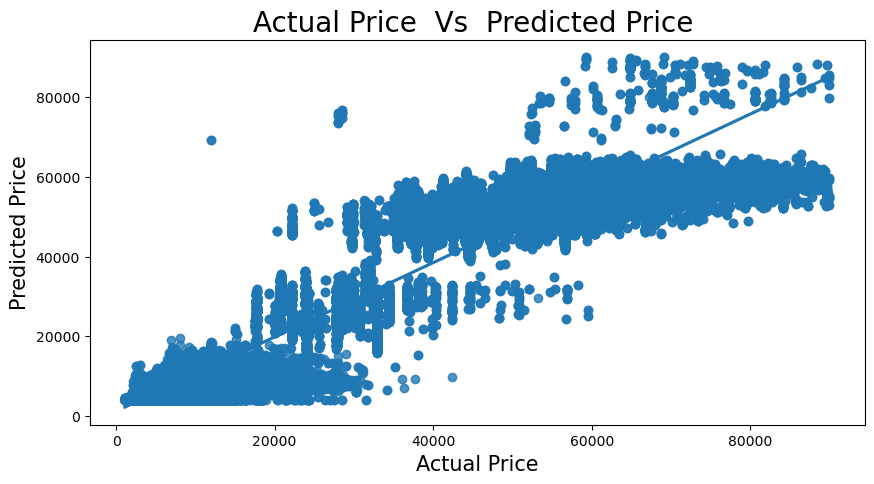

In [138]:
## SCATTER PLOT OF ACTUAL PRICE VERSUS PREDICTED PRICE
plt.figure(figsize=(10,5))
sns.regplot(x='Actual',y='Predicted',data=result)
plt.title('Actual Price  Vs  Predicted Price ', fontsize = 20)
plt.xlabel('Actual Price',fontsize = 15)
plt.ylabel('Predicted Price',fontsize = 15)
plt.show()

In [139]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %.4f" % rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.4f" % mae)

r2 = r2_score(y_test, y_pred)
print("R2: %.4f" % r2)

MSE: 30814040.1975
RMSE: 5551.0396
MAE: 3566.5560
R2: 0.9395


In [140]:
#-------------------
#Research Questions
#-------------------
#The aim of our study is to answer the below research questions:
#a) Does price vary with Airlines?
#b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
#c) Does ticket price change based on the departure time and arrival time?
#d) How the price changes with change in Source and Destination?
#e) How does the ticket price vary between Economy and Business class?